# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## **Importing necessary libraries and data**

In [ ]:
# Obligatory pd and np import
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# General model imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For scoring and optimization
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls drive/MyDrive/Great_Learning/Project_2

Mounted at /content/drive
 ExtraaLearn.csv
 Learner+Notebook+-+Full+Code+Version+-+Potential+Customers+Prediction.ipynb
 Learner_Notebook_Low_Code_Version_Potential_Customers_Prediction.ipynb
'Proj todo.gdoc'


In [ ]:
extraaLearn = pd.read_csv("drive/MyDrive/Great_Learning/Project_2/ExtraaLearn.csv")
data = extraaLearn.copy()

## **Data Overview**

- Observations
- Sanity checks

In [ ]:
data.shape

(4612, 15)

In [ ]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# Check for any duplicate values
data['ID'].value_counts()[data['ID'].value_counts() > 1]

,count
ID,


In [ ]:
# Now that we know there are no duplicates, we don't really need ID for anything,
# so we will just drop it now
data.drop(["ID"], axis = 1, inplace = True)

In [ ]:
# Look at dtypes so I know what to change in preprocessing.  I am assuming that
# some will need to be changed to bool after looking at the head.
data.dtypes

,0
age,int64
current_occupation,object
first_interaction,object
profile_completed,object
website_visits,int64
time_spent_on_website,int64
page_views_per_visit,float64
last_activity,object
print_media_type1,object
print_media_type2,object


In [ ]:
# I know that the preprocessing section is later, but I find some of the column
# names and dtypes to be confusing, so I am going to change them now for ease
# and clarity within EDA.

# Renaming the columns to more easily interprettable names
data.rename(columns={'print_media_type1':'media_news', "print_media_type2":'media_mag', 'digital_media':'media_dig',
                     'educational_channels':'media_edu'}, inplace=True)

# Casting non-Boolean columns to Boolean so that it is easier to work with later
data['status'] = data['status'].astype(bool)
data = data.replace({'Yes':True, 'No':False})

<ipython-input-9-855e54dd272c>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Yes':True, 'No':False})


## **Exploratory Data Analysis (EDA)**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,media_news,media_mag,media_dig,media_edu,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,True,False,True,False,False,True
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,False,False,False,True,False,False
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,False,False,True,False,False,False
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,False,False,False,False,False,True
4,23,Student,Website,High,4,600,16.914,Email Activity,False,False,False,False,False,False


In [ ]:
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit
count,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126
std,13.161454,2.829134,743.828683,1.968125
min,18.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750
50%,51.000000,3.000000,376.000000,2.792000
75%,57.000000,5.000000,1336.750000,3.756250
max,63.000000,30.000000,2537.000000,18.434000


Of the numeric variables, time_spent_on_website seems to have the most variance, but not excessively so.  Some of the max values for website_visits and page_views_per_visit appear a bit outlier-ish, but we will look at the more during pre-processing.

### Univariate Analysis

In [ ]:
def plot_categoricals(*columns):
    # This plots all of the input columns as side-by-side bar plots

    # Create a 3 by categories/3 (rounded up) grid
    n_cols = 3
    n_graphs = len(columns)
    n_rows = int(np.ceil(n_graphs / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()


    for i in range(n_graphs):
        t, d = columns[i]

        # For some reason, the bools act wacky and plot as 0 and 1 unless I map
        # to string variables
        if d.dtype == bool:
            d = d.map({False: 'False', True: 'True'})

        counts = d.value_counts()
        categories = counts.index
        counts = counts.values

        axes[i].bar(categories, counts)
        axes[i].set_title(t)
        axes[i].tick_params(axis='x', rotation=25)
        axes[i].set_xlabel('Category')
        axes[i].set_ylabel('Count')


    # Hide the unused subplots
    for i in range(n_graphs, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

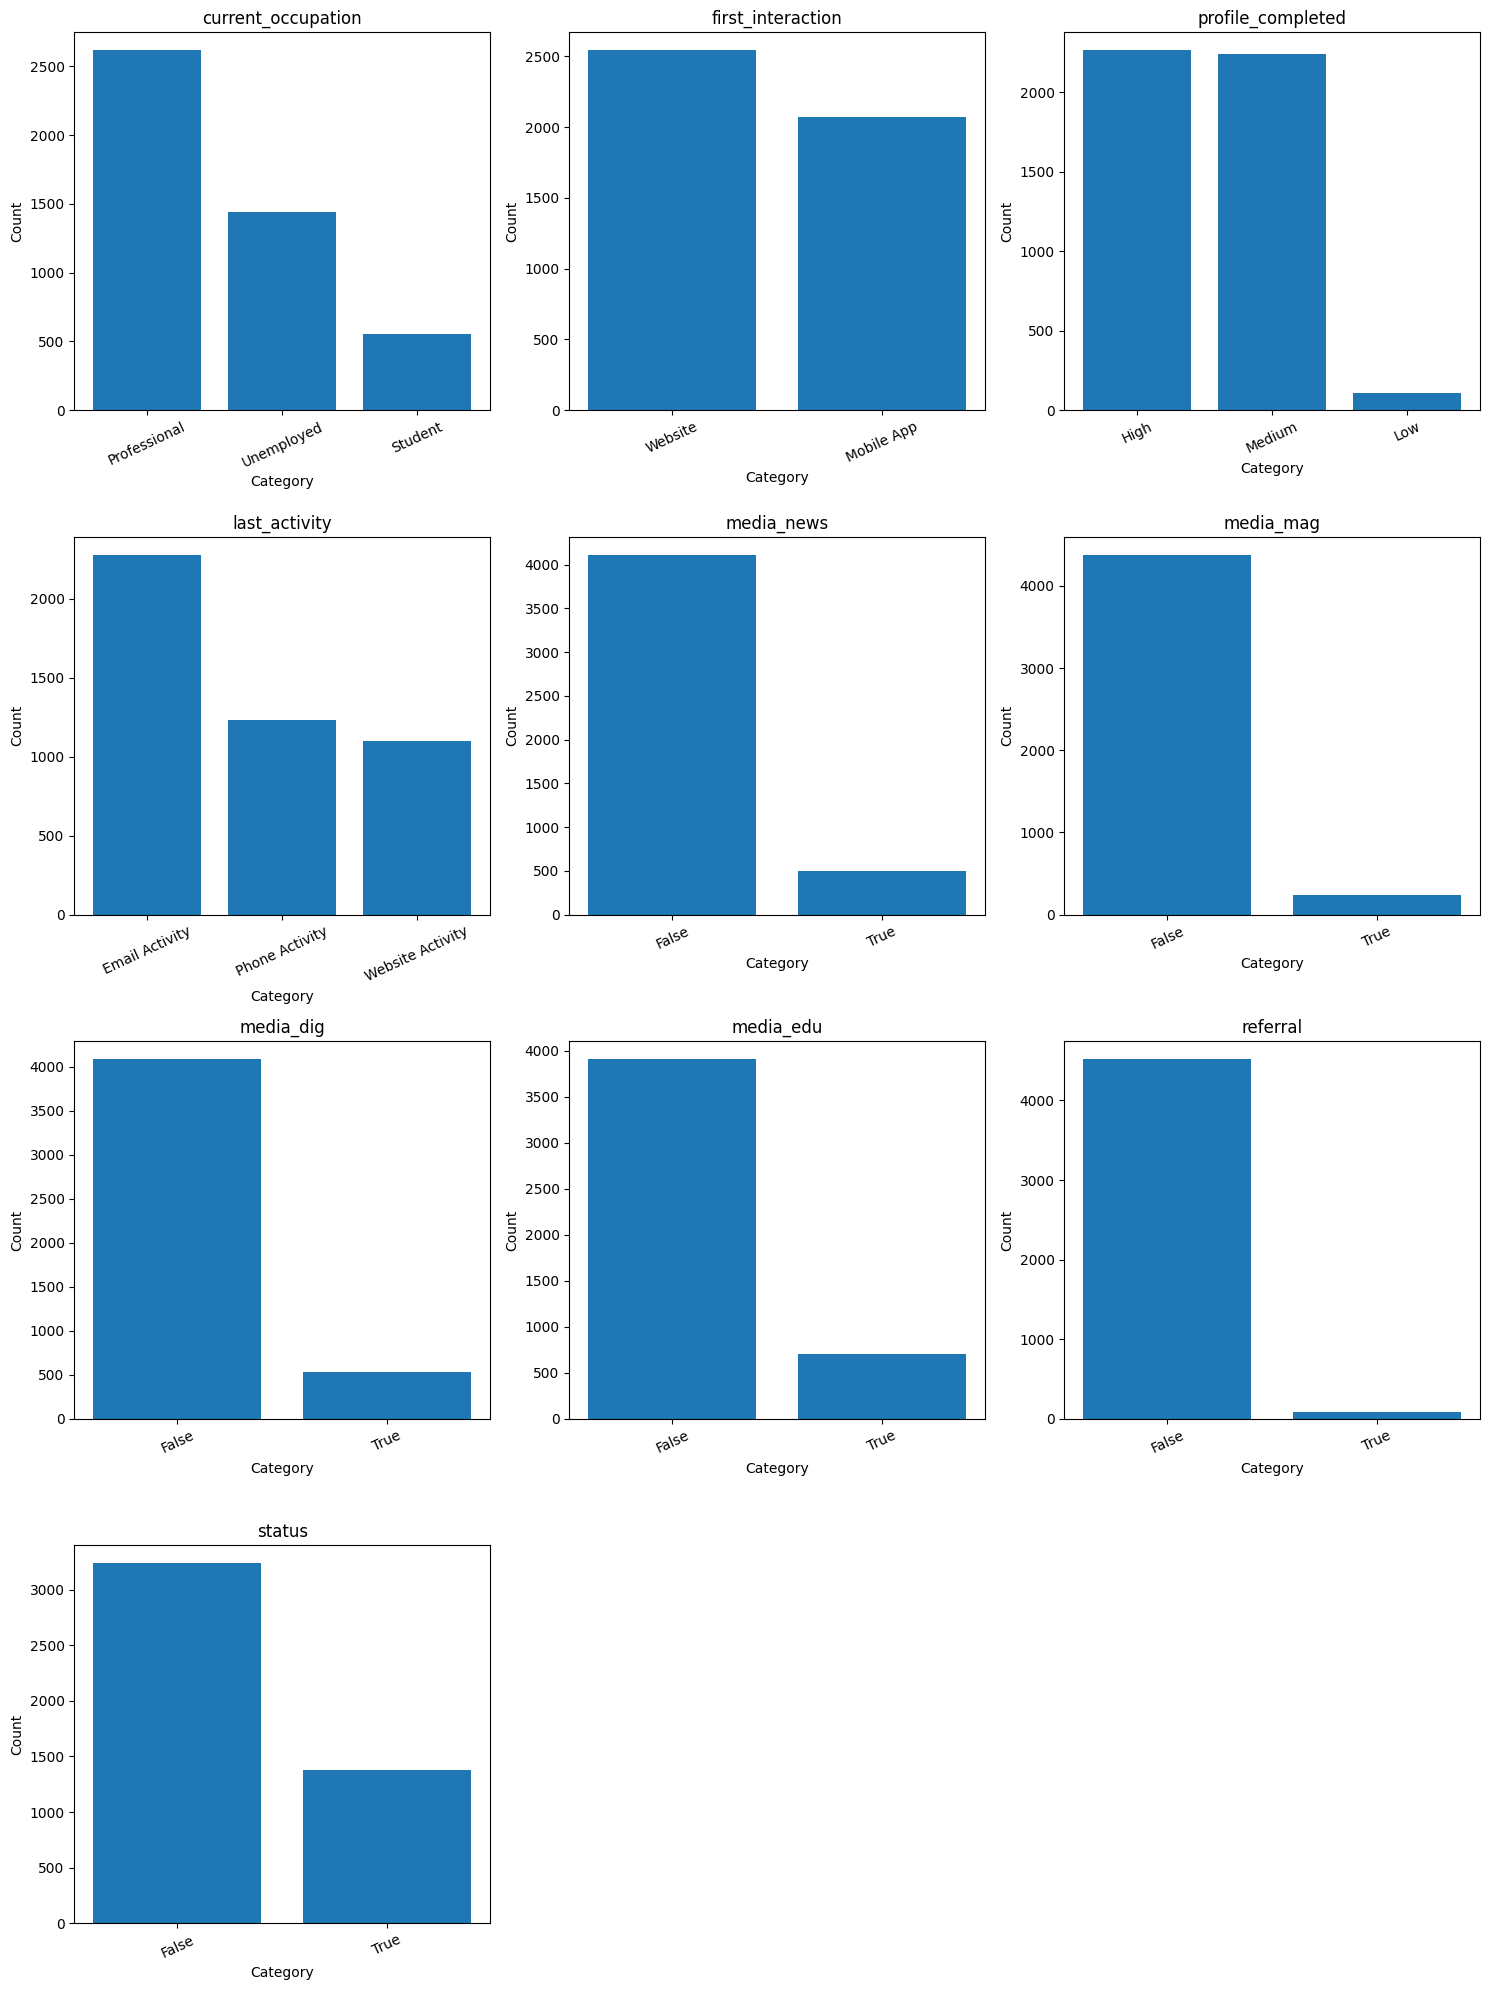

In [ ]:
col_titles = list(data.select_dtypes(["object","bool"]).columns)

# This generator expression provides a tuple with (Title, Series) for each column
# When packed/unpacked into the function, it feeds in as a tuple of however many of these tuples
plot_categoricals(*(data[col_titles].items()))

All of the boolean variables have much more instances of False than the do True, meaning these are somewhat rare instances that could potentially be very telling as to whether the lead will convert or not.

Most leads appear to at least complete 50% of their profile, which means ExtraaLearn is either making it very easy for them or the website is engaging enough to encourage one to complete their profile.  

There are more professionals than unemployed and students combined, meaning ExtraaLearn is clearly appealing to that demographic.

Email activity is noticeably higher than phone or website, likely meaning that the ExtraaLearn team is on top of sending leads emails.

Nothing else glaring to note.

In [ ]:
def plot_numericals(*columns):
    # This plots all of the input columns as side-by-side histograms

    n_cols = 3
    n_graphs = len(columns)
    n_rows = int(np.ceil(n_graphs / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()


    for i in range(n_graphs):
        t, d = columns[i]

        #counts, bins = np.histogram(d)
        #axes[i].stairs(counts, bins, fill=True)
        axes[i].hist(d)
        axes[i].set_title(t)
        axes[i].tick_params(axis='x', rotation=25)
        axes[i].set_xlabel('Category')
        axes[i].set_ylabel('Count')


    # Hide the unused subplots
    for i in range(n_graphs, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

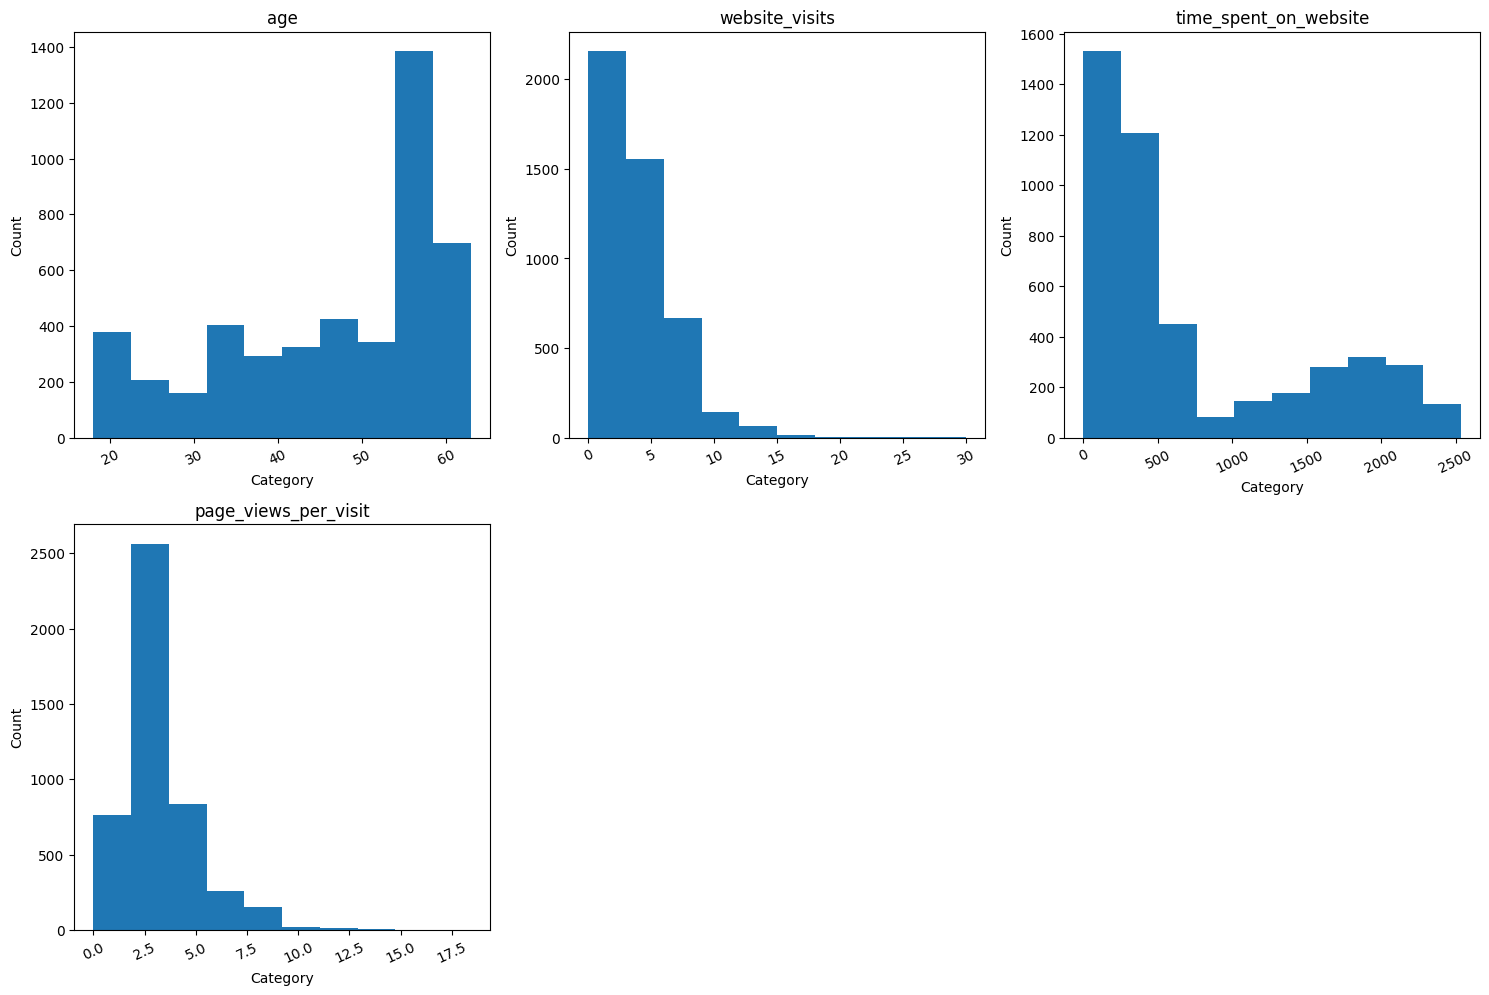

In [ ]:
num_titles = list(data.select_dtypes(["int64","float64"]).columns)
plot_numericals(*(data[num_titles].items()))

The age is highly left skewed, as one would expect of a professional-skills-oriented educational platform.  Though the average / mode age is much higher than one might initially expect.  

Website visits is almost entirely between 1 and 10, with slight right skew into the higher numbers.

Time spent on website is heavily right skewed, almost to the point of being bimodal.  Perhaps this is representative of two different demographics of interest in leads, something worth paying attention to for later.

Page views per visit appears much more normally distributed, but cutting off early on the left due to not possibly going lower than 0.

### Bivariate Analysis

#### Questions

1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

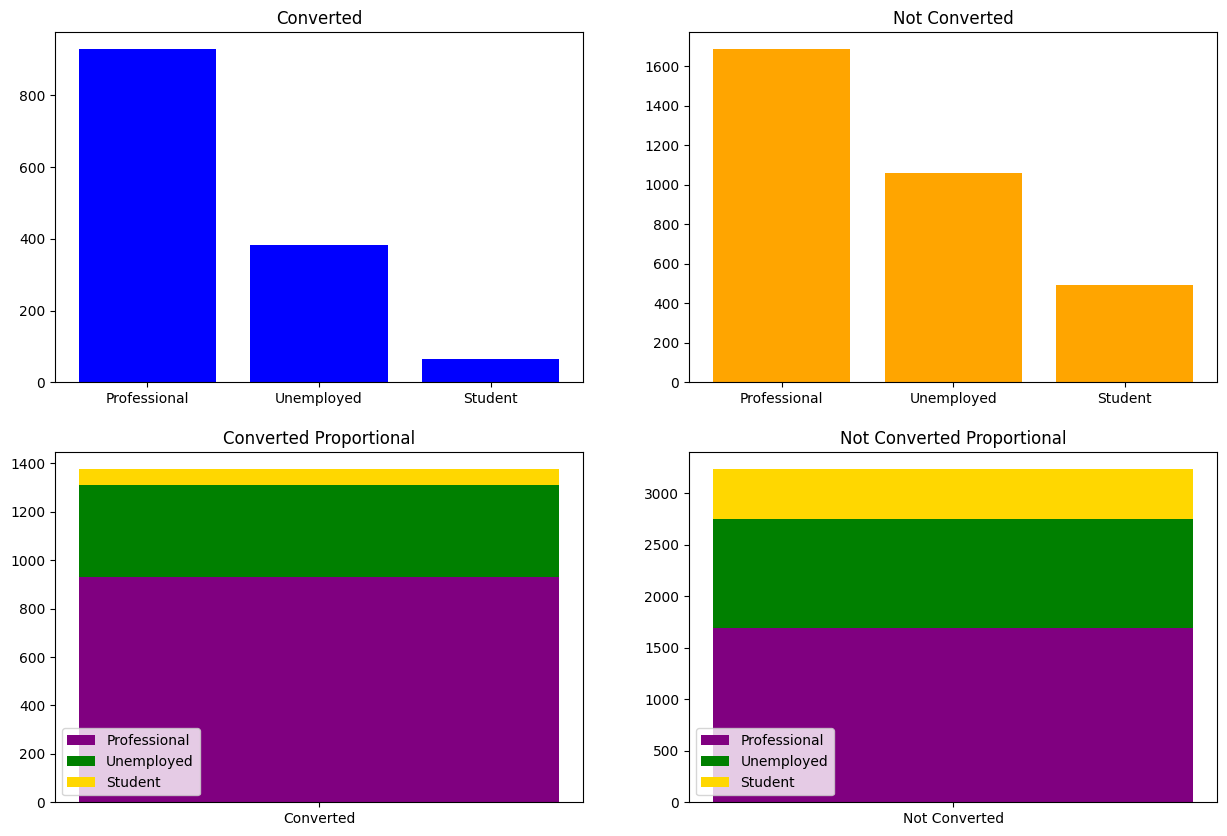

In [ ]:
##### 1 #####

lead_true  = data[data['status'] == True]
lead_false = data[data['status'] == False]

occu_counts_true  = lead_true['current_occupation'].value_counts()
occu_counts_false = lead_false['current_occupation'].value_counts()



fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

axes[0].bar(occu_counts_true.index , occu_counts_true.values , color='blue')
axes[0].set_title('Converted')
axes[1].bar(occu_counts_false.index, occu_counts_false.values, color='orange')
axes[1].set_title('Not Converted')

bot=0
colors = ['purple', 'green', 'gold']
for i, name in enumerate(occu_counts_true.index):
    axes[2].bar(x = 'Converted', height = occu_counts_true.values[i], color=colors[i], label=name, bottom=bot)
    bot += occu_counts_true.values[i]

bot=0
for i, name in enumerate(occu_counts_false.index):
    axes[3].bar(x = 'Not Converted', height = occu_counts_false.values[i], color=colors[i], label=name, bottom=bot)
    bot += occu_counts_false.values[i]

axes[2].set_title('Converted Proportional')
axes[3].set_title('Not Converted Proportional')
axes[2].legend()
axes[3].legend()

plt.show()

It appears that professional leads are proportionally more likely to convert, while students are proportionally less likely to convert.  Unemployed leads are slightly less likely to convert, but not significantly so.

In [ ]:
############################################################################

2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

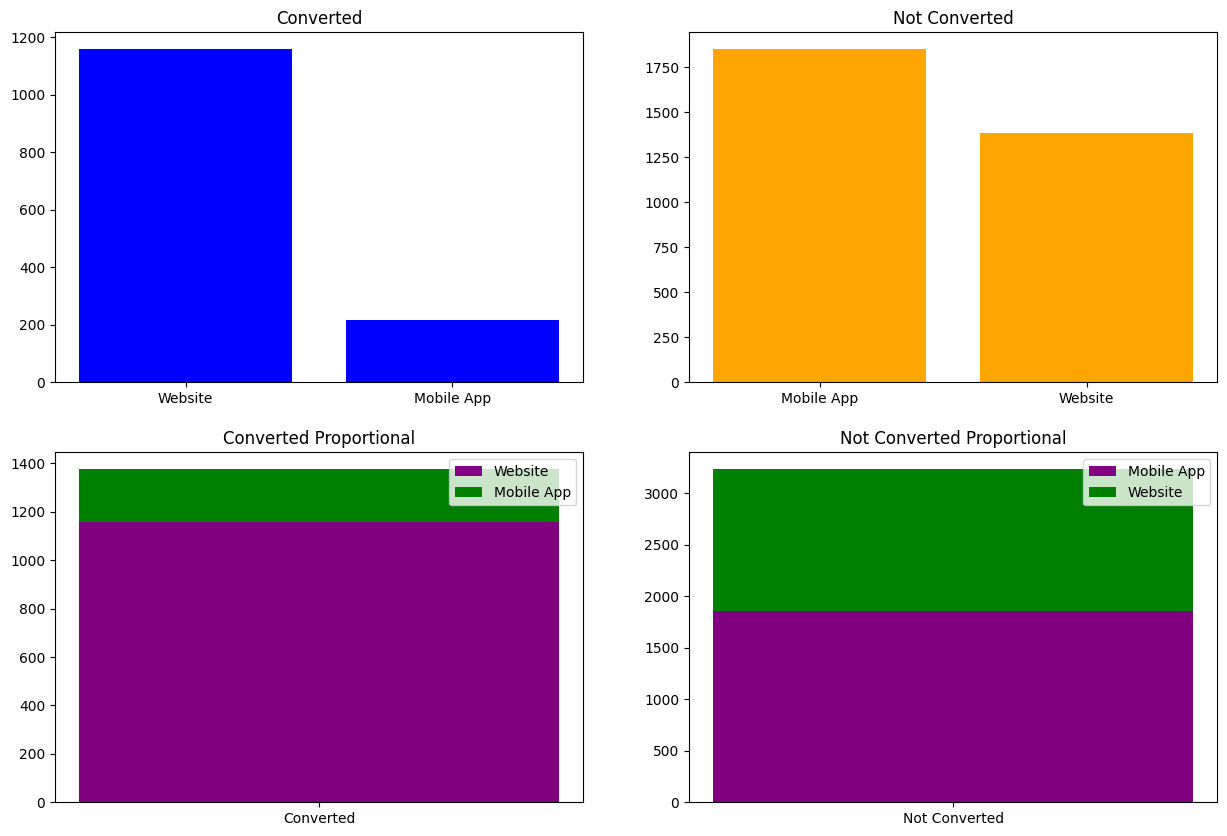

In [ ]:
##### 2 #####

inter_counts_true  = lead_true['first_interaction'].value_counts()
inter_counts_false = lead_false['first_interaction'].value_counts()



fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

axes[0].bar(inter_counts_true.index , inter_counts_true.values , color='blue')
axes[0].set_title('Converted')
axes[1].bar(inter_counts_false.index, inter_counts_false.values, color='orange')
axes[1].set_title('Not Converted')

bot=0
colors = ['purple', 'green', 'gold']
for i, name in enumerate(inter_counts_true.index):
    axes[2].bar(x = 'Converted', height = inter_counts_true.values[i], color=colors[i], label=name, bottom=bot)
    bot += inter_counts_true.values[i]

bot=0
for i, name in enumerate(inter_counts_false.index):
    axes[3].bar(x = 'Not Converted', height = inter_counts_false.values[i], color=colors[i], label=name, bottom=bot)
    bot += inter_counts_false.values[i]

axes[2].set_title('Converted Proportional')
axes[3].set_title('Not Converted Proportional')
axes[2].legend()
axes[3].legend()

plt.show()

Those who interacted with the website first make up the majority of the converted leads, while those who interacted with the mobile app make up the majority of non-converted leads.  Thus, we can conclude that those who interact with the website first are significantly more likely to convert into paying customers.

In [ ]:
############################################################################

3. The company uses multiple modes to interact with prospects. Which way of interaction works best?

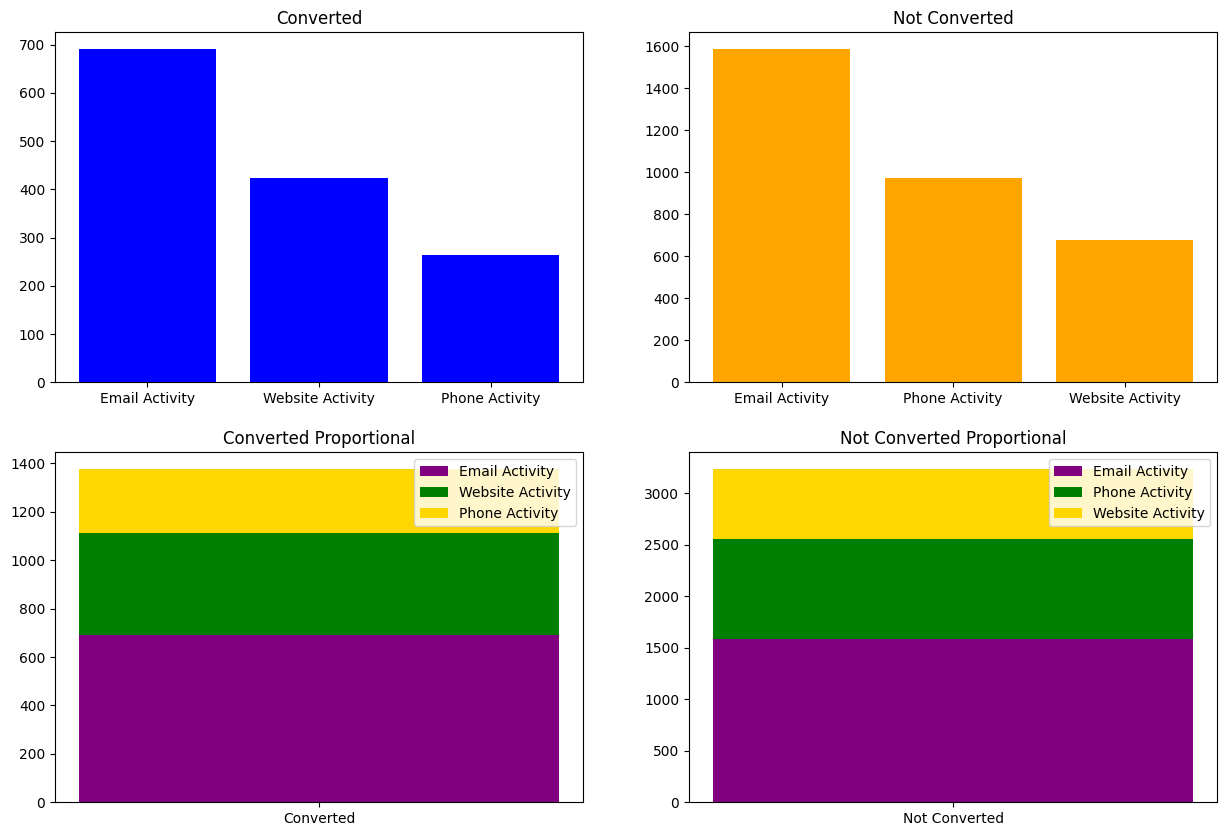

In [ ]:
##### 3 #####

active_counts_true  = lead_true['last_activity'].value_counts()
active_counts_false = lead_false['last_activity'].value_counts()



fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

axes[0].bar(active_counts_true.index , active_counts_true.values , color='blue')
axes[0].set_title('Converted')
axes[1].bar(active_counts_false.index, active_counts_false.values, color='orange')
axes[1].set_title('Not Converted')

bot=0
colors = ['purple', 'green', 'gold']
for i, name in enumerate(active_counts_true.index):
    axes[2].bar(x = 'Converted', height = active_counts_true.values[i], color=colors[i], label=name, bottom=bot)
    bot += active_counts_true.values[i]

bot=0
for i, name in enumerate(active_counts_false.index):
    axes[3].bar(x = 'Not Converted', height = active_counts_false.values[i], color=colors[i], label=name, bottom=bot)
    bot += active_counts_false.values[i]

axes[2].set_title('Converted Proportional')
axes[3].set_title('Not Converted Proportional')
axes[2].legend()
axes[3].legend()

plt.show()

The proportions of interaction between converted and non-converted leads seem nearly identical.  I think it is fair to say that last activity / mode of interaction with ExtraaLearn does not have a significant effect on lead conversion chances.

In [ ]:
############################################################################

4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

(0.0, 1.0, 0.0, 1.0)

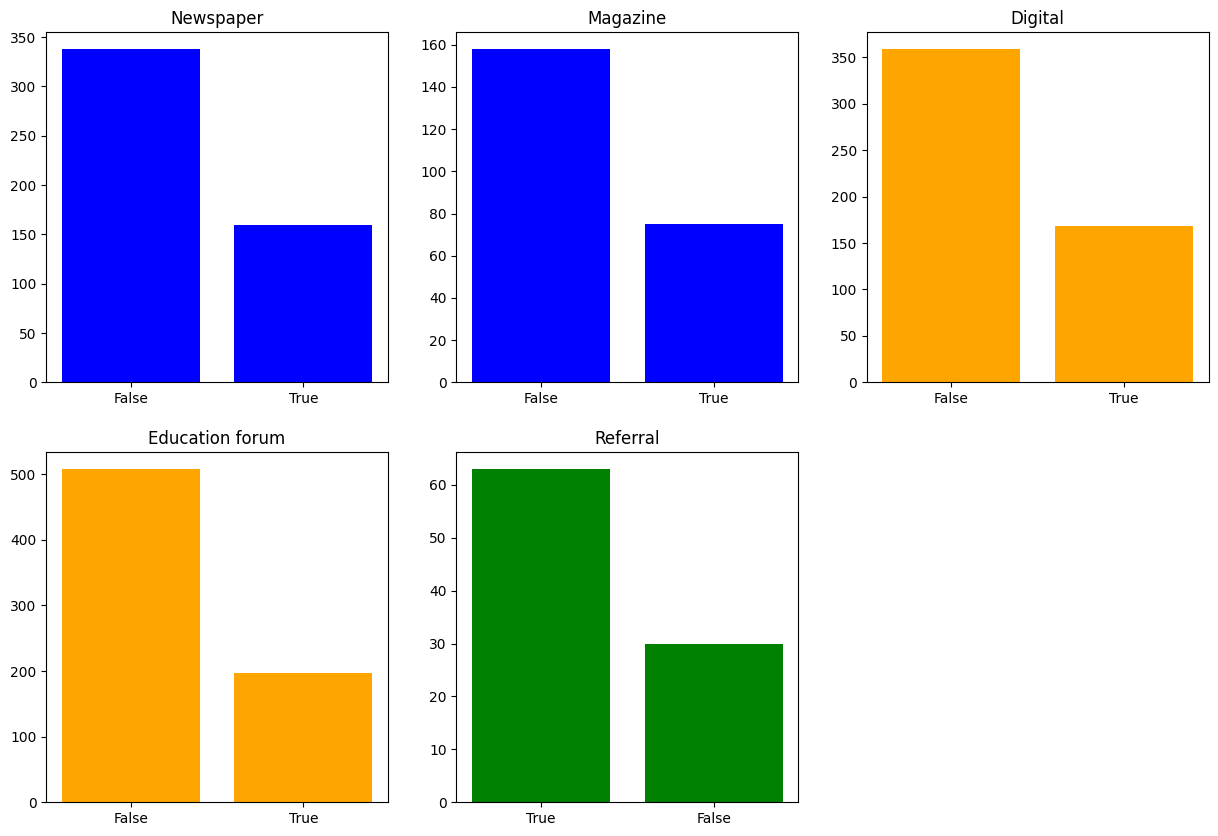

In [ ]:
##### 4 #####

news_true  = data[data['media_news'] == True]
mag_true  = data[data['media_mag'] == True]
dig_true  = data[data['media_dig'] == True]
edu_true  = data[data['media_edu'] == True]
referral_true  = data[data['referral'] == True]


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

news_counts = news_true['status'].map({False: 'False', True: 'True'}).value_counts()
axes[0].bar(news_counts.index, news_counts.values, color='blue')
axes[0].set_title('Newspaper')

mag_counts = mag_true['status'].map({False: 'False', True: 'True'}).value_counts()
axes[1].bar(mag_counts.index, mag_counts.values, color='blue')
axes[1].set_title('Magazine')

dig_counts = dig_true['status'].map({False: 'False', True: 'True'}).value_counts()
axes[2].bar(dig_counts.index, dig_counts.values, color='orange')
axes[2].set_title('Digital')

edu_counts = edu_true['status'].map({False: 'False', True: 'True'}).value_counts()
axes[3].bar(edu_counts.index, edu_counts.values, color='orange')
axes[3].set_title('Education forum')

referral_counts = referral_true['status'].map({False: 'False', True: 'True'}).value_counts()
axes[4].bar(referral_counts.index, referral_counts.values, color='green')
axes[4].set_title('Referral')

axes[5].axis('off')

All of the media channels seem to have similar conversion rates except for referalls, which are much more likely than not to be converted into leads.  Education also seems to have a slightly lower conversion rate than the other media lead sources.

In [ ]:
############################################################################

5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

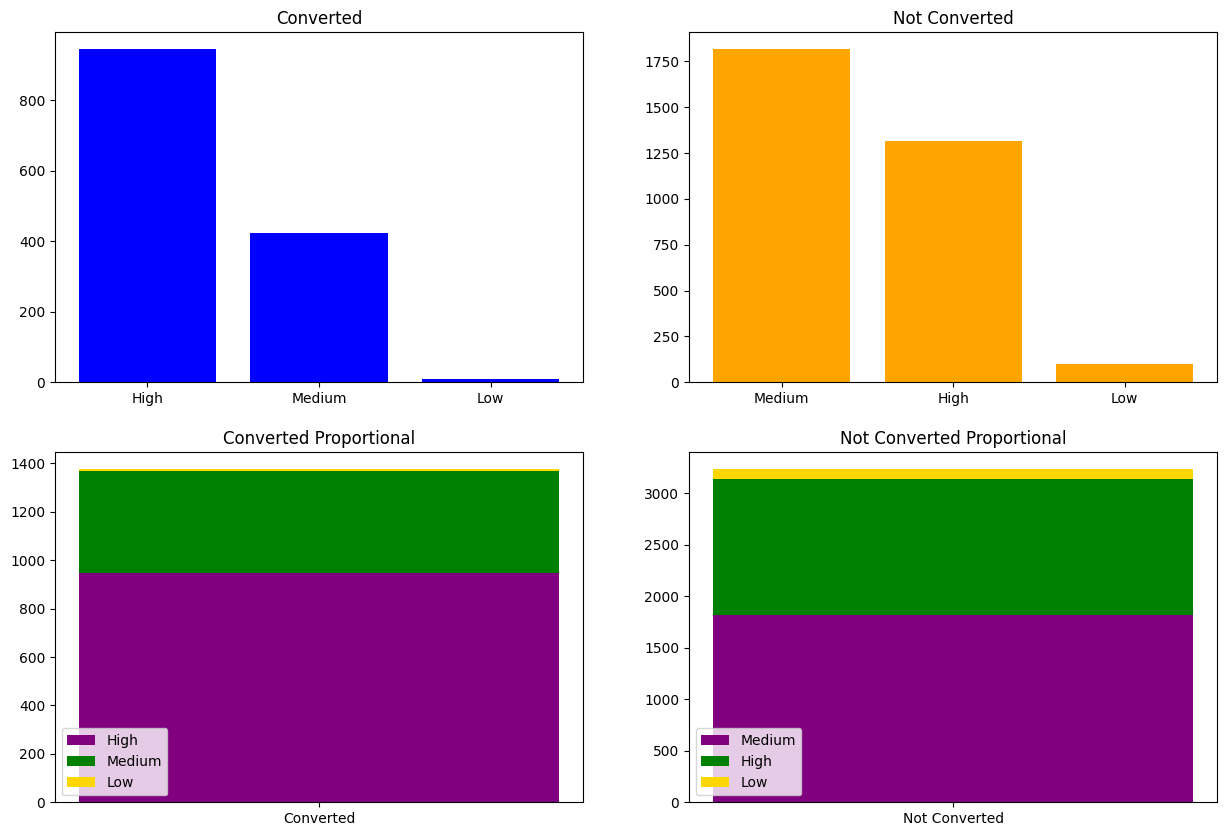

In [ ]:
##### 5 #####

profile_counts_true  = lead_true['profile_completed'].value_counts()
profile_counts_false = lead_false['profile_completed'].value_counts()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

axes[0].bar(profile_counts_true.index , profile_counts_true.values , color='blue')
axes[0].set_title('Converted')
axes[1].bar(profile_counts_false.index, profile_counts_false.values, color='orange')
axes[1].set_title('Not Converted')

bot=0
colors = ['purple', 'green', 'gold']
for i, name in enumerate(profile_counts_true.index):
    axes[2].bar(x = 'Converted', height = profile_counts_true.values[i], color=colors[i], label=name, bottom=bot)
    bot += profile_counts_true.values[i]

bot=0
for i, name in enumerate(profile_counts_false.index):
    axes[3].bar(x = 'Not Converted', height = profile_counts_false.values[i], color=colors[i], label=name, bottom=bot)
    bot += profile_counts_false.values[i]

axes[2].set_title('Converted Proportional')
axes[3].set_title('Not Converted Proportional')
axes[2].legend()
axes[3].legend()

plt.show()

Unsurprisingly, leads who completed a high amount of their profile were significantly more likely to convert, making up over two thirds of the converted population.  Low profile completion also indicated less likelyhood to convert, representing almost none of the lead conversions.  Medium profile completions can still convert, but were significantly more likely to not convert.  It is also worth noting that even though high profile completion occured in most conversions, leads who had high profile completion were still more likely to not convert.

#### Additional Bivariate Analysis

We know from above that, besides referrals, the type of media that the user learns about ExtraaLearn from doesn't seem to make a significant difference on their conversion rate.  However, they may be more likely to convert if they interact with multiple pieces of media (or no media at all).

Below, we will check to see if the number of media types interacted with affects conversion rate, particularly in the instances when referral is not included (though we will also check including referrals as well).

<ipython-input-25-8783130d1dcd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_media['True_count'] = data_media_nostatus.sum(axis=1)
<ipython-input-25-8783130d1dcd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_media['True_count_noref'] = data_media_noref.sum(axis=1)


Text(0.5, 1.0, 'Not Converted (no references)')

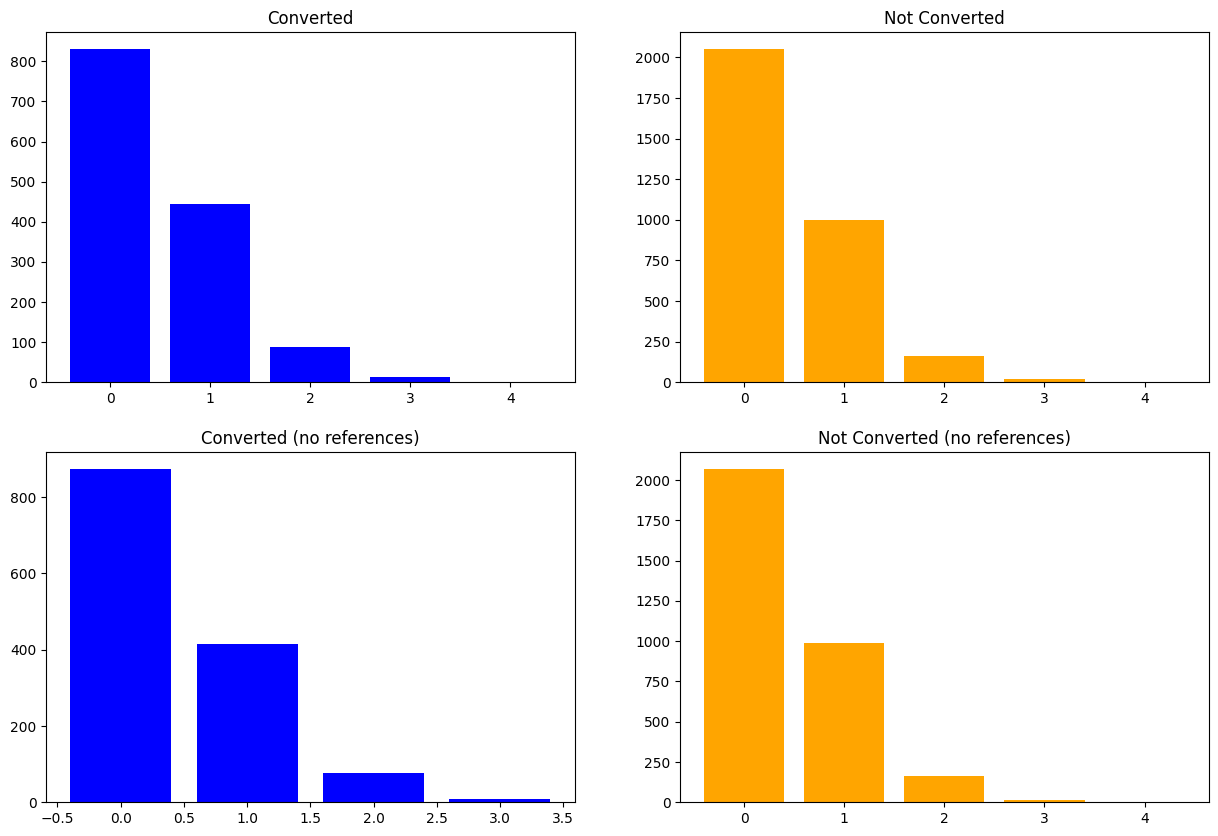

In [ ]:
data_media = data[['media_news', 'media_mag', 'media_dig', 'media_edu', 'referral', 'status']]
data_media_nostatus = data_media.drop('status', axis=1)
data_media_noref = data_media_nostatus.drop('referral', axis=1)

data_media['True_count'] = data_media_nostatus.sum(axis=1)
data_media['True_count_noref'] = data_media_noref.sum(axis=1)


lead_true_media  = data_media[data_media['status'] == True]
lead_false_media = data_media[data_media['status'] == False]

data_media_true_counts  = lead_true_media['True_count'].value_counts()
data_media_false_counts = lead_false_media['True_count'].value_counts()
data_media_true_counts_noref  = lead_true_media['True_count_noref'].value_counts()
data_media_false_counts_noref = lead_false_media['True_count_noref'].value_counts()



fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

axes[0].bar(data_media_true_counts.index , data_media_true_counts.values , color='blue')
axes[0].set_title('Converted')
axes[1].bar(data_media_false_counts.index , data_media_false_counts.values , color='orange')
axes[1].set_title('Not Converted')
axes[2].bar(data_media_true_counts_noref.index , data_media_true_counts_noref.values , color='blue')
axes[2].set_title('Converted (no references)')
axes[3].bar(data_media_false_counts_noref.index , data_media_false_counts_noref.values , color='orange')
axes[3].set_title('Not Converted (no references)')

In [ ]:
# These graphs aren't indicating much, mostly just highlighting the distribution of the data.
# Perhaps we can calculate the chance that a lead will convert given the amount of media
# sources they have interacted with.

placeholder = np.append(data_media_true_counts_noref.values, 0)
conversion_chances       = data_media_true_counts.values       / (data_media_true_counts.values       + data_media_false_counts.values)
conversion_chances_noref = placeholder                         / (placeholder                         + data_media_false_counts_noref.values)

print("Conversion chances of 0, 1, 2, 3, and 4 media interation types                      :", conversion_chances)
print("Conversion chances of 0, 1, 2, 3, and 4 media interation types (excluding referrals):", conversion_chances_noref)

Conversion chances of 0, 1, 2, 3, and 4 media interation types                      : [0.28824142 0.30859917 0.34661355 0.39393939 0.33333333]
Conversion chances of 0, 1, 2, 3, and 4 media interation types (excluding referrals): [0.29697587 0.2962963  0.32635983 0.375      0.        ]


There does appear to be an increase in likelihood of conversion as number of media interactions increases!  This effect is stronger when referrals are included in the consideration, but it is present in both cases.  It is also worth noting that the dropoff at 4 interactions is almost certainly due to lack of data, causing sharp probability changes with any variance.

In [ ]:
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,media_news,media_mag,media_dig,media_edu,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,True,False,True,False,False,True
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,False,False,False,True,False,False
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,False,False,True,False,False,False
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,False,False,False,False,False,True
4,23,Student,Website,High,4,600,16.914,Email Activity,False,False,False,False,False,False


We should check to see if website visits and time spent on the website affect conversion rates.  If these are found to be true, then the company can make efforts to keep users engaged on its website.

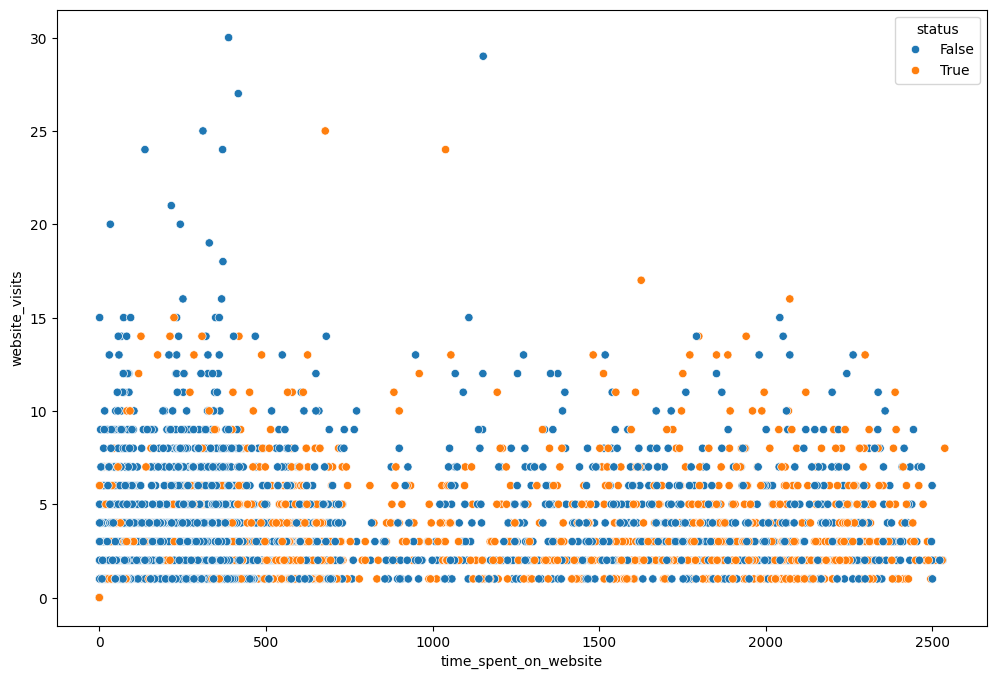

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='time_spent_on_website', y='website_visits', hue='status')
plt.show()

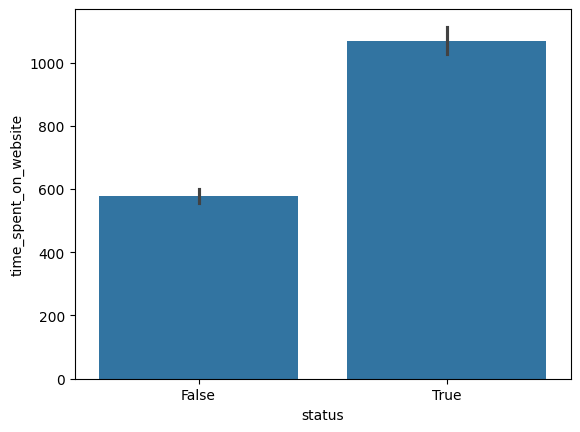

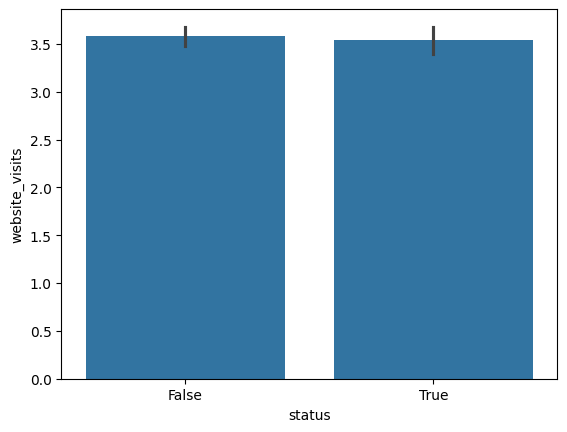

In [ ]:
# Surprisingly, time_spent_on_website and website_visits don't seem to be correlated at all
# Let's try plotting them against status individually

sns.barplot(data=data, x='status', y='time_spent_on_website')
plt.show()
print()
sns.barplot(data=data, x='status', y='website_visits')
plt.show()

It appears that, while number of website visits has little effect on lead conversion, leads who convert spend much more time on the website on average.  This strong effect size doesn't necessarily imply causation, but it might be something worth while for ExtraaLearn to pay attention to.

## **Data Preprocessing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)


No missing values came up during EDA and we fixed the incongruencies with the boolean variables already, so we really just need to look for outliers here.  And while feature engineering might be a nice bonus to spend time on, I don't think we particularly need to engineer any features before passing them to the decision trees, particularly because the tree don't actually directly compare the features to each other, and so differences in magnitude should just be absorbed into the model fitting process.

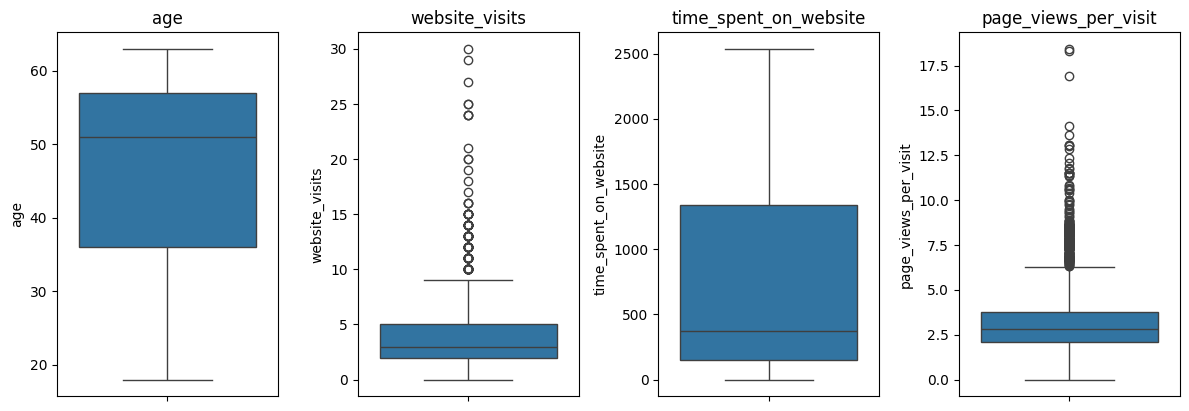

In [ ]:
# Outlier visualization for numeric variables
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 8))
for i in range(len(numeric_cols)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[numeric_cols[i]])
    plt.title(numeric_cols[i])
plt.tight_layout()
plt.show()

# It looks like there are some technical outliers in website_visits and page_views_per_visit, but nothing crazy enough to warrent removal from the dataset.

In [ ]:
# Splitting the data into train and test sets of features and labels

X = data.drop(["status"], axis=1)
X = pd.get_dummies(X, drop_first=True)
Y = data["status"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
X.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,media_news,media_mag,media_dig,media_edu,referral,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,True,False,True,False,False,False,True,True,False,False,False,True
1,56,2,83,0.320,False,False,False,True,False,False,False,False,False,True,False,True
2,52,3,330,0.074,False,False,True,False,False,False,False,True,False,True,False,True
3,53,4,464,2.057,False,False,False,False,False,False,True,True,False,False,False,True
4,23,4,600,16.914,False,False,False,False,False,True,False,True,False,False,False,False


### EDA of modelling data

- It is a good idea to explore the data once again after manipulating it.

We looked at a lot beforehand and didn't change much since performing EDA (because we found no serious outliers), but it is worth looking at the side of the datasets to understand what we are working with.

In [ ]:
print('Train shape, test shape')
print(X_train.shape, X_test.shape)
print()

# There are plenty of training and testing examples, but we will have to be careful
# not to make our models too complex here because this amount of data can be easily overfit

# There are 16 features to work with that may be used to determine status

Train shape, test shape
(3689, 16) (923, 16)



## **Building a Decision Tree model**

- Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
- Find the factors driving the lead conversion process
- Create a profile of the leads which are likely to convert

### Base model

Let's start with the most basic decision tree model and improve/optimize from there

In [ ]:
def eval_pred(y_actual, y_pred):
    print(metrics.classification_report(y_actual, y_pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot = True,  fmt = '1',
                xticklabels = ['Predicted False', 'Predicted True'], yticklabels = ['Actual False', 'Actual True'])
    plt.show()

In [ ]:
dTree = DecisionTreeClassifier(random_state=7)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2587
        True       1.00      1.00      1.00      1102

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



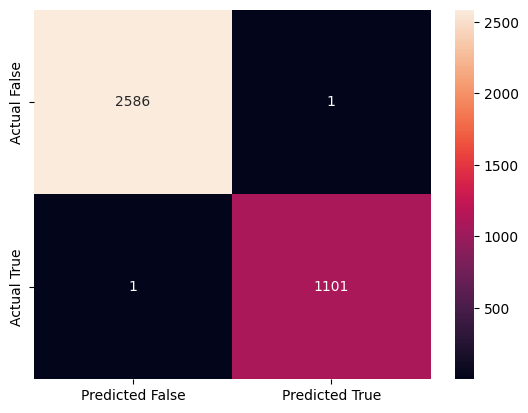

In [ ]:
# Training evaluation

yPred = dTree.predict(X_train)
yActual = y_train
print(metrics.classification_report(yActual, yPred))

sns.heatmap(confusion_matrix(yActual, yPred), annot = True,  fmt = '1',
            xticklabels = ['Predicted False', 'Predicted True'], yticklabels = ['Actual False', 'Actual True'])
plt.show()

              precision    recall  f1-score   support

       False       0.88      0.85      0.87       648
        True       0.68      0.73      0.70       275

    accuracy                           0.82       923
   macro avg       0.78      0.79      0.78       923
weighted avg       0.82      0.82      0.82       923



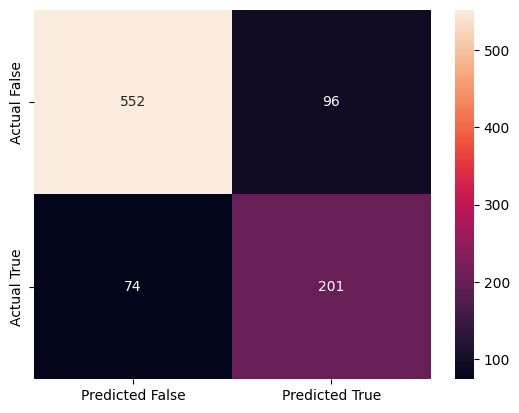

In [ ]:
# Testing evaluation

yPred = dTree.predict(X_test)
yActual = y_test
print(metrics.classification_report(yActual, yPred))

sns.heatmap(confusion_matrix(yActual, yPred), annot = True,  fmt = '1',
            xticklabels = ['Predicted False', 'Predicted True'], yticklabels = ['Actual False', 'Actual True'])
plt.show()

### Do we need to prune the tree?

We absolutely need to prune this tree due to the clear overfitting within its base configuration.

Right now, it is getting a perfect score on the train data and a decent score on the testing data. Let's see if we can't even out those scores a little bit.

In [ ]:
dTree.tree_.max_depth

23

In [ ]:
# We are using cross_validation here to try and find the depth that generalizes best without
# contaminating the model with testing set information.  Cross_val kind of lets us "test"
# without actually exposing the model to testing influence, essentially simulating generalization

from sklearn.model_selection import cross_val_score

depths = range(1, 21)  # Test depths from 1 to 20
scores = []
for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=7)
    score = cross_val_score(tree, X_train, y_train).mean()
    scores.append(score)

bestD = depths[np.argmax(scores)]
bestDepthTree = DecisionTreeClassifier(max_depth=bestD, random_state=7)
bestDepthTree.fit(X_train, y_train)
bestDepthTree.tree_.max_depth

6

TRAINING SCORES
              precision    recall  f1-score   support

       False       0.91      0.90      0.91      2587
        True       0.78      0.80      0.79      1102

    accuracy                           0.87      3689
   macro avg       0.85      0.85      0.85      3689
weighted avg       0.87      0.87      0.87      3689



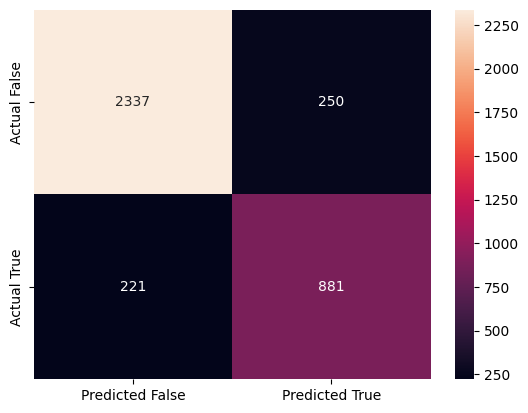



TESTING SCORES
              precision    recall  f1-score   support

       False       0.91      0.87      0.89       648
        True       0.72      0.80      0.76       275

    accuracy                           0.85       923
   macro avg       0.82      0.83      0.82       923
weighted avg       0.85      0.85      0.85       923



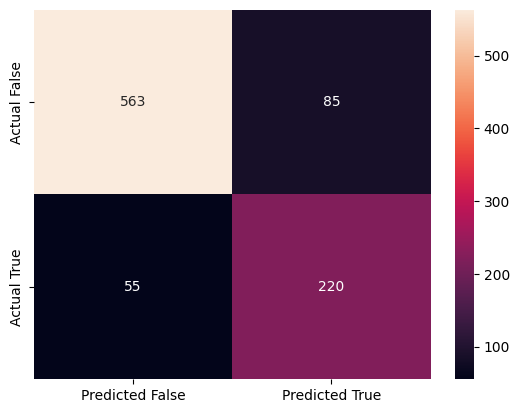

In [ ]:
# Training evaluation

print("TRAINING SCORES")
yPred = bestDepthTree.predict(X_train)
yActual = y_train
print(metrics.classification_report(yActual, yPred))

sns.heatmap(confusion_matrix(yActual, yPred), annot = True,  fmt = '1',
            xticklabels = ['Predicted False', 'Predicted True'], yticklabels = ['Actual False', 'Actual True'])
plt.show()

print()
print()

# Testing evaluation

print("TESTING SCORES")
yPred = bestDepthTree.predict(X_test)
yActual = y_test
print(metrics.classification_report(yActual, yPred))

sns.heatmap(confusion_matrix(yActual, yPred), annot = True,  fmt = '1',
            xticklabels = ['Predicted False', 'Predicted True'], yticklabels = ['Actual False', 'Actual True'])
plt.show()

Compared to the default tree's testing accuracy, the pruned version is much better! This can be particularly in the reduction of false negatives, which is arguably the more important error to avoid considering that the ExtraaLearn misses out on profits from an entire customer in this case (and considering that, as a new company, ExtraaLearn needs to prioritize getting a foundational customer base).

### Fine tuning and optimization

The first of the three objectives of this project is to "Analyze and build an ML model to help identify which leads are more likely to convert to paid customers."  With this in mind, it would be useful to have some sort of **process that can bias the model towards identifying who is more likely to convert** (rather than who is likely not to convert).  From a budget perspective, **this would equate to balancing money spent on man hours attempting to convert a lead with the money made from a successful lead conversion**.  Spending data and executive sentiment would be necessary to find the optimal ratio to balance recall vs precision prioritization, but from the objective, **we can assume that we want to prioritize precision**, maximizing the amount of leads converted to paying customers, or gross profit.

In [ ]:
from sklearn.metrics import precision_recall_curve

# Same as tree.predict, but instead returns probabilities of False and True. The True class is the second, thus [:, 1]
y_scores_train = bestDepthTree.predict_proba(X_train)[:, 1]
# Feeds in actual values and prediction probabilities to adjust the threshold where a prediction is considered True or False
# Like instead of 0.5 being lowest possible to consider a prediction True, now it might be 0.4
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_train)

# We want to optimize recall here so that we catch more instances of leads that would be converted (potential profit)
# Because the thresholds are ordered from high recall to low recall, we will have to take the last value from np.where
# to get the threshold for the lowest recall value that is above our target
optimal_threshold = thresholds[np.where(recalls > 0.9)[0][-1]]  # Target recall > 90%

y_scores_test = bestDepthTree.predict_proba(X_test)[:, 1]
yPredWeighted = (y_scores_test >= optimal_threshold).astype(int)

TESTING SCORES
              precision    recall  f1-score   support

       False       0.95      0.78      0.86       648
        True       0.64      0.91      0.75       275

    accuracy                           0.82       923
   macro avg       0.80      0.85      0.80       923
weighted avg       0.86      0.82      0.83       923



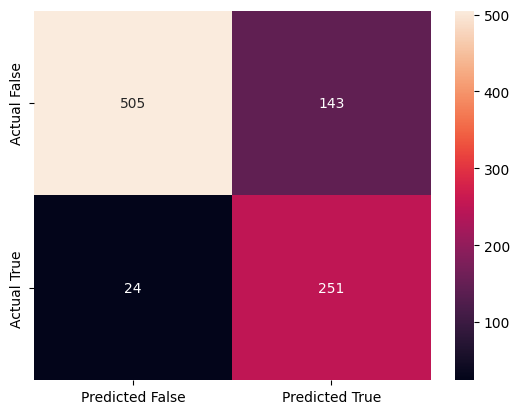

In [ ]:
print("TESTING SCORES")
yActual = y_test
print(metrics.classification_report(yActual, yPredWeighted))

sns.heatmap(confusion_matrix(yActual, yPredWeighted), annot = True,  fmt = '1',
            xticklabels = ['Predicted False', 'Predicted True'], yticklabels = ['Actual False', 'Actual True'])
plt.show()

This is a surefire way to get whatever recall score we desire, or to make sure that ExtraaLearn converts, say 90% or 95% of potential leads.  We can also make these adjustments to any model, granted that the probabilities aren't so optimized that there are near-100% chances throughout the model.

TESTING SCORES
              precision    recall  f1-score   support

       False       0.94      0.81      0.87       648
        True       0.67      0.88      0.76       275

    accuracy                           0.83       923
   macro avg       0.80      0.84      0.81       923
weighted avg       0.86      0.83      0.84       923



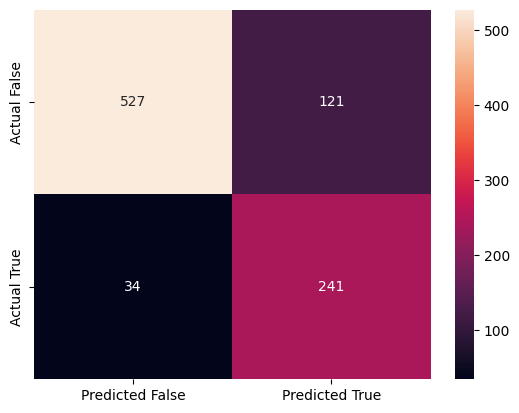

In [ ]:
# Let's compare the responsive technique of threshold adjustment to the pre-emptive
# approach of putting more weight on the True class

# Right now, the True class could be considered as underrepresented because there are less instances
# of leads that will convert vs not convert (True vs False).
# By changing the class_weight to 'balanced', it biases the model towards overvaluing those underrepresented
# cases of True.
classWeightedTree = DecisionTreeClassifier(max_depth=bestD, random_state=7, class_weight="balanced")
classWeightedTree.fit(X_train, y_train)

print("TESTING SCORES")
yPred = classWeightedTree.predict(X_test)
yActual = y_test
print(metrics.classification_report(yActual, yPred))

sns.heatmap(confusion_matrix(yActual, yPred), annot = True,  fmt = '1',
            xticklabels = ['Predicted False', 'Predicted True'], yticklabels = ['Actual False', 'Actual True'])
plt.show()

This seems to achieve a very similar effect to our threshhold adjustments! The recall is 1% lower, but f-score in each category is 1% higher, a fair tradeoff.  We will continue to use the balanced class_weight from here on out in order to demonstrate our priority of recall to the model.

### GridSearchCV to find an optimal model

Finally, with all of these optimization points in mind, we can use GridSearchCV to brute force check the best hyperparameter candidates in order to find an optimal decision tree model.

In [ ]:
# outputting some parameters from our best depth tree to get a ballpark of what hyperparameters we should check
bestDepthTree.tree_.n_leaves, bestDepthTree.tree_.n_node_samples, bestDepthTree.tree_.max_depth, len(X.columns)

(47,
 array([3689, 1654,  906,  894,  103,   67,   55,   12,   36,    1,   35,
         791,   12,   11,    9,    2,    1,    1,    1,  748,  573,  559,
           2,  557,  388,  169,   14,    7,    7,    4,    3,  175,   15,
         160,  154,   82,   72,    6, 2035, 1127,  567,   81,    6,    4,
           2,   75,   73,    2,  486,  319,  292,   27,  167,   62,  105,
         560,  454,  106,  103,   10,   93,    3,    2,    1,  908,  662,
         593,  372,  366,    6,  221,  106,  115,   69,   57,   32,   25,
          12,  246,  133,   23,   22,    1,  110,  108,    2,  113,    3,
           1,    2,  110,   47,   63], dtype=int64),
 6,
 16)

In [ ]:
# I've gone ahead and included a couple more hyperparameters to potentially optimize
param_grid = {
    "class_weight": ['balanced'],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, 15],
    "max_features": [None, 4, 8, 12],
    "max_leaf_nodes": [10, 30, 50, 70],
    "min_samples_leaf": [1, 3, 5],
    "min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=7), param_grid, cv=5)
grid_search.fit(X_train, y_train)

bestTree = grid_search.best_estimator_

TESTING SCORES
              precision    recall  f1-score   support

       False       0.95      0.82      0.88       648
        True       0.68      0.90      0.77       275

    accuracy                           0.84       923
   macro avg       0.81      0.86      0.83       923
weighted avg       0.87      0.84      0.85       923



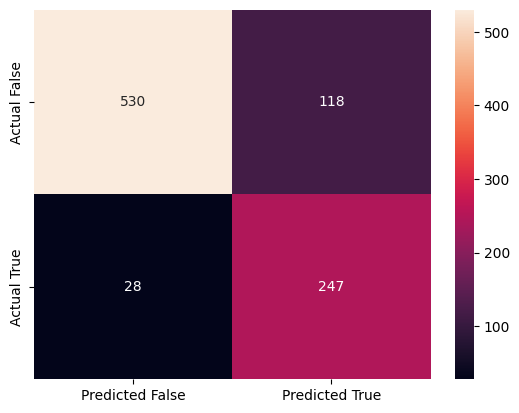

In [ ]:
print("TESTING SCORES")
yPred = bestTree.predict(X_test)
yActual = y_test
print(metrics.classification_report(yActual, yPred))

sns.heatmap(confusion_matrix(yActual, yPred), annot = True,  fmt = '1',
            xticklabels = ['Predicted False', 'Predicted True'], yticklabels = ['Actual False', 'Actual True'])
plt.show()

We're hitting 90% testing recall with an even better f-score!

In [ ]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [ ]:
# One more refined search now that we have a ballpark size of the optimal hyperparameter values
param_grid = {
    "class_weight": ['balanced'],
    "criterion": ["gini", "entropy"],
    "max_depth": [8, 9, 10, 11],
    "max_features": [None, 14, 15],
    "max_leaf_nodes": [20, 25, 30, 35, 40],
    "min_samples_leaf": [2, 3, 4],
    "min_samples_split": [2, 3, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=7), param_grid, cv=5)
grid_search.fit(X_train, y_train)

bestTree = grid_search.best_estimator_
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

Basically the same tree but with 9 depth instead of 10

FINAL OPTIMIZED TRAINING SCORES
              precision    recall  f1-score   support

       False       0.94      0.85      0.89      2587
        True       0.71      0.88      0.78      1102

    accuracy                           0.86      3689
   macro avg       0.83      0.86      0.84      3689
weighted avg       0.87      0.86      0.86      3689



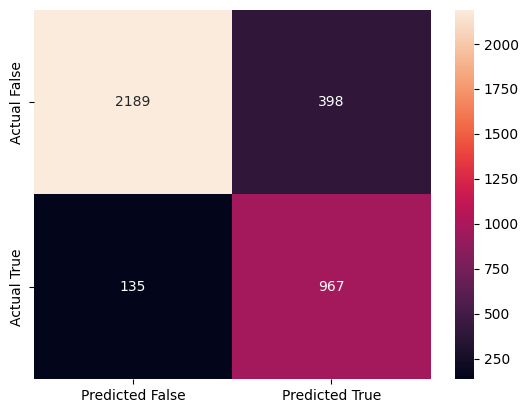

FINAL OPTIMZED TESTING SCORES
              precision    recall  f1-score   support

       False       0.95      0.82      0.88       648
        True       0.68      0.90      0.77       275

    accuracy                           0.84       923
   macro avg       0.81      0.86      0.83       923
weighted avg       0.87      0.84      0.85       923



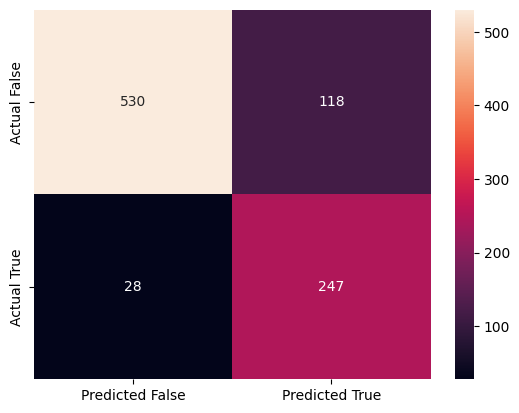

In [ ]:
print("FINAL OPTIMIZED TRAINING SCORES")
yPred = bestTree.predict(X_train)
yActual = y_train
print(metrics.classification_report(yActual, yPred))

sns.heatmap(confusion_matrix(yActual, yPred), annot = True,  fmt = '1',
            xticklabels = ['Predicted False', 'Predicted True'], yticklabels = ['Actual False', 'Actual True'])
plt.show()

print("FINAL OPTIMZED TESTING SCORES")
yPred = bestTree.predict(X_test)
yActual = y_test
print(metrics.classification_report(yActual, yPred))

sns.heatmap(confusion_matrix(yActual, yPred), annot = True,  fmt = '1',
            xticklabels = ['Predicted False', 'Predicted True'], yticklabels = ['Actual False', 'Actual True'])
plt.show()

The further optimized model seems to be essentially the same as the previous iteration, except for have 1 less max depth.  Since the scores are identical, I am assuming that the 10th layer was not used by the last model either, and this is simply indicative of them both being the same model with depths of 9.

### Tree visualization and insights

To help understand what is going on and potentially garner insights from the most optimal trees

In [ ]:
bestTree = grid_search.best_estimator_
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [ ]:
pd.Series(bestTree.feature_importances_, index=X_train.columns).sort_values(ascending=False)

,0
first_interaction_Website,0.299715
time_spent_on_website,0.258562
profile_completed_Medium,0.233766
age,0.041602
last_activity_Website Activity,0.034718
last_activity_Phone Activity,0.029521
current_occupation_Student,0.029460
current_occupation_Unemployed,0.023635
page_views_per_visit,0.018264
profile_completed_Low,0.015845


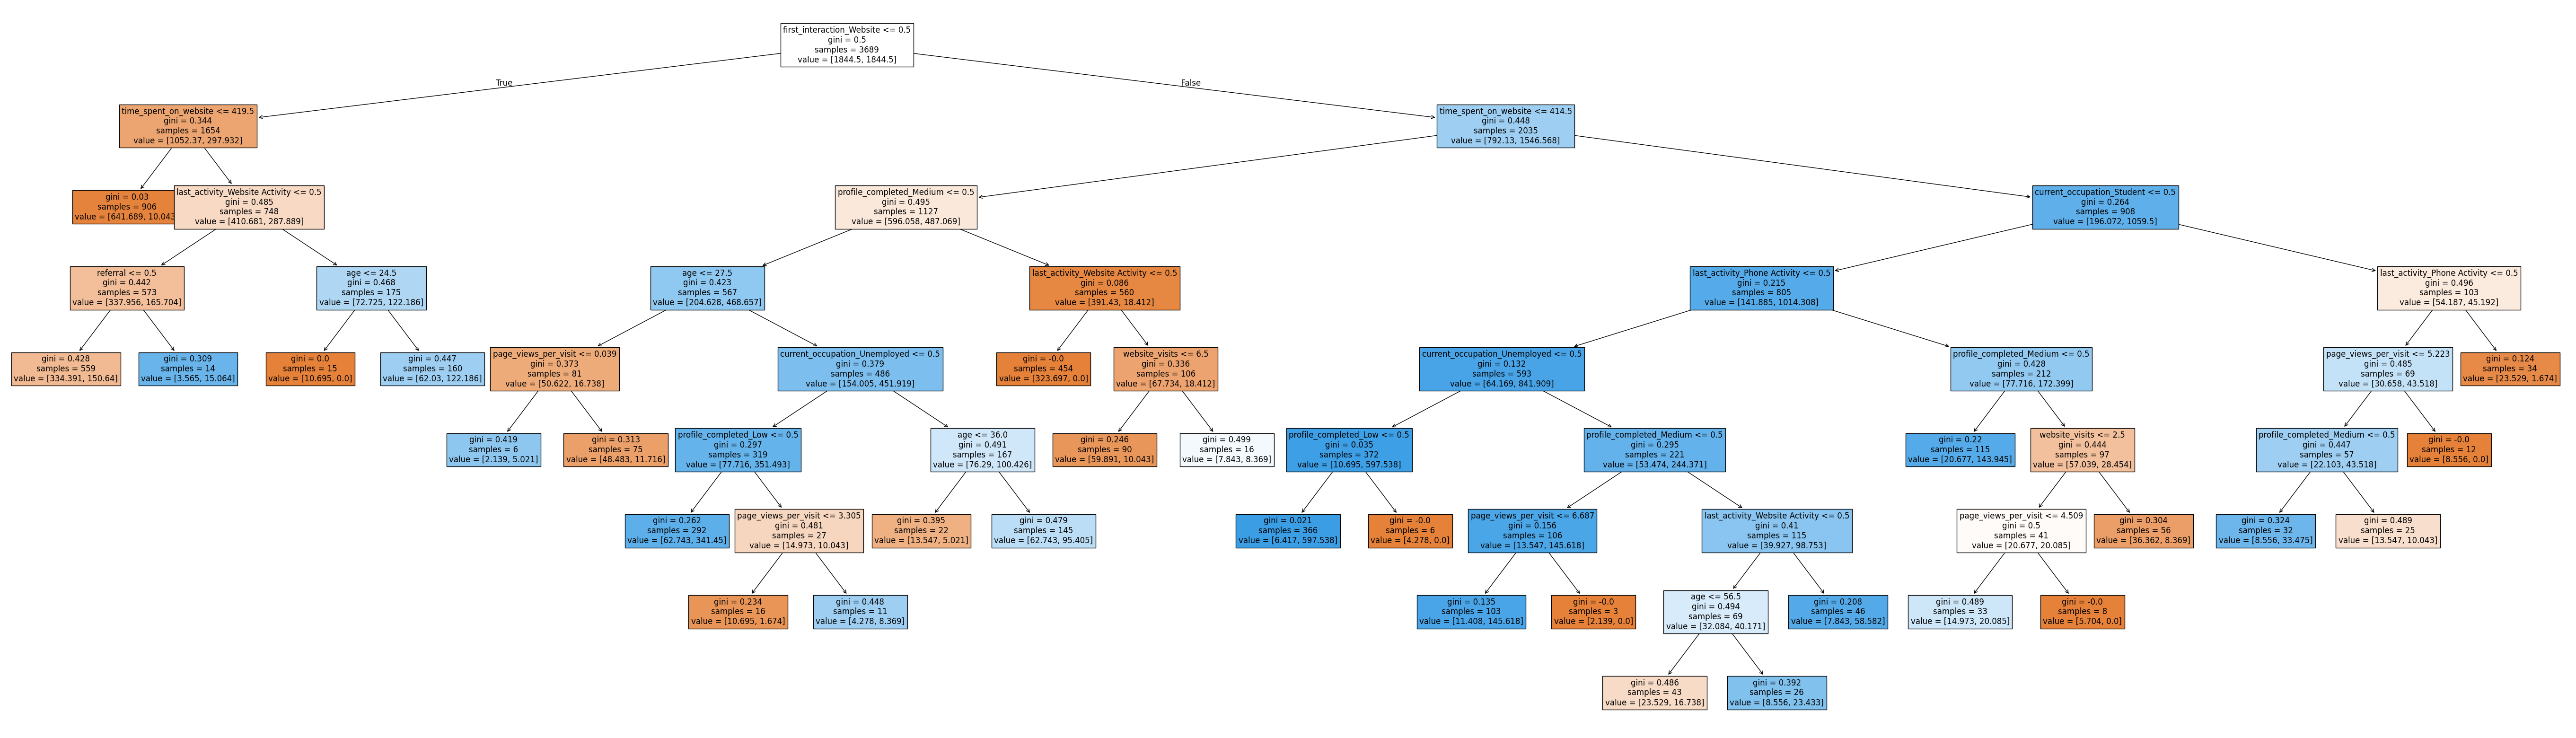

In [ ]:
from sklearn.tree import plot_tree


plt.figure(figsize=(70, 20))
plot_tree(bestTree, filled=True, feature_names=list(X.columns), fontsize=12)
plt.show()

In [ ]:
pd.Series(bestDepthTree.feature_importances_, index=X_train.columns).sort_values(ascending=False)

,0
time_spent_on_website,0.269400
first_interaction_Website,0.246833
profile_completed_Medium,0.194192
age,0.063071
last_activity_Phone Activity,0.057254
current_occupation_Unemployed,0.051695
current_occupation_Student,0.030962
profile_completed_Low,0.025304
last_activity_Website Activity,0.020130
page_views_per_visit,0.019868


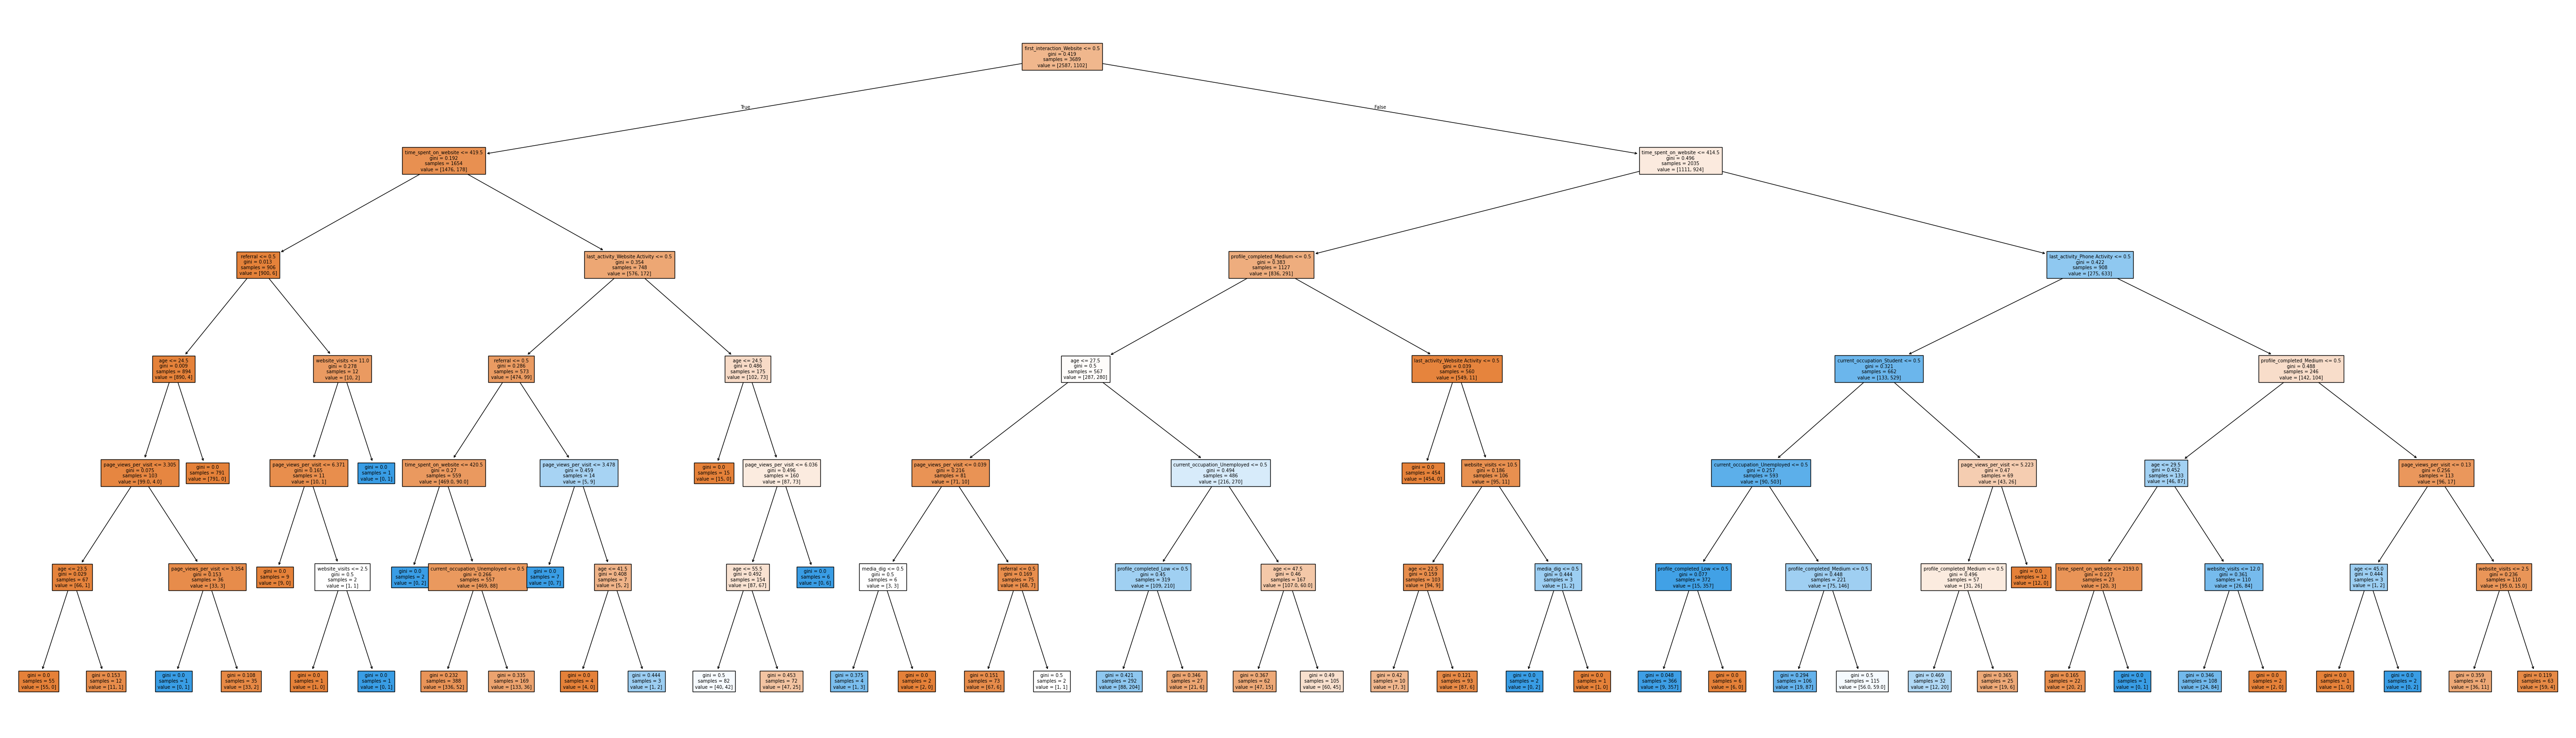

In [ ]:
plt.figure(figsize=(70, 20))
plot_tree(bestDepthTree, filled=True, feature_names=list(X.columns), fontsize=7)
plt.show()

**Insights**

In the best depth tree, and even moreso in the fully optimized tree, three features were significantly more important / telling than any others in direction the model's decisions.  These features were:
- time_spent_on_website
- first_interaction_Website
- profile_completed_medium

When you look at the tree's structures, you can also see how starkly these features guided the tree's big decisions.  For example, the heavily blue branch on the right side of bestTree comes from time_spent_on_website, which also happens to guide the entire other side of the tree too.  Then profile_completed_medium precedes almost a thrid of the data, sitting atop the middle cluster of nodes, and first_interaction_Website is the first decision made by the entire tree.

Many other features did still contribute to the decision making process, but these ones are clearly highlighted by the model as worth paying attention when trying to identify a worthwhile lead.


## **Building a Random Forest model**

### Base model

In [ ]:
rfBase = RandomForestClassifier(random_state=7)
rfBase.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

TRAINING PERFORMANCE
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2587
        True       1.00      1.00      1.00      1102

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



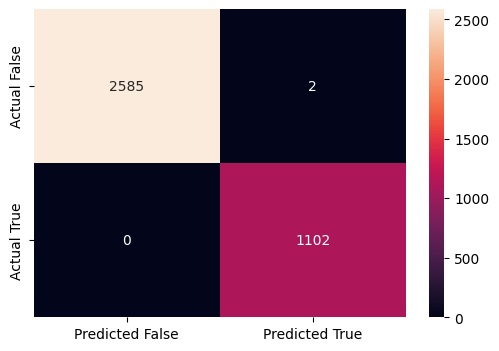


TESTING PERFORMANCE
              precision    recall  f1-score   support

       False       0.90      0.91      0.91       648
        True       0.79      0.76      0.77       275

    accuracy                           0.87       923
   macro avg       0.84      0.84      0.84       923
weighted avg       0.87      0.87      0.87       923



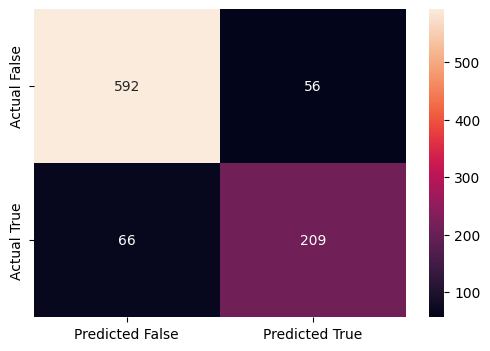

In [ ]:
print("TRAINING PERFORMANCE")
eval_pred(y_train, rfBase.predict(X_train))

print()
print("TESTING PERFORMANCE")
eval_pred(y_test, rfBase.predict(X_test))

There appears to be overfitting, however generalization is still better than the base decision tree model.  Additionally, we are already getting relatively good testing accuracy (compared to the desision tree) off the bat despite the overfitting.

### Do we need to prune the tree?

There is certainly overfitting present despite the better generalization compared to the normal decision tree, so we might as well try pruning to see if our accuracy improves.

In [ ]:
depth_list = np.array([rfBase.estimators_[i].tree_.max_depth for i in range(len(rfBase.estimators_))])
depth_list

array([25, 25, 25, 29, 24, 26, 24, 26, 26, 23, 25, 25, 25, 23, 26, 22, 24,
       21, 23, 25, 23, 22, 23, 25, 28, 25, 25, 25, 26, 24, 23, 23, 21, 23,
       25, 22, 24, 26, 25, 23, 26, 22, 24, 23, 28, 28, 23, 21, 23, 21, 24,
       29, 24, 25, 27, 25, 26, 24, 25, 23, 21, 22, 26, 26, 21, 23, 24, 24,
       25, 21, 23, 26, 22, 23, 23, 23, 25, 23, 23, 23, 25, 28, 27, 22, 25,
       25, 24, 26, 23, 23, 22, 21, 21, 24, 24, 23, 24, 23, 25, 27])

In [ ]:
depths = range(1, 25)  # Test depths from 1 to 25
scores = []
for d in depths:
    rf = RandomForestClassifier(max_depth=d, random_state=7)
    score = cross_val_score(rf, X_train, y_train).mean()
    scores.append(score)

bestD = depths[np.argmax(scores)]
rfBestDepth = RandomForestClassifier(max_depth=bestD, random_state=7)
rfBestDepth.fit(X_train, y_train)

depth_list = np.array([rfBestDepth.estimators_[i].tree_.max_depth for i in range(len(rfBestDepth.estimators_))])
depth_list

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

TRAINING PERFORMANCE
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      2587
        True       0.89      0.83      0.86      1102

    accuracy                           0.92      3689
   macro avg       0.91      0.89      0.90      3689
weighted avg       0.92      0.92      0.92      3689



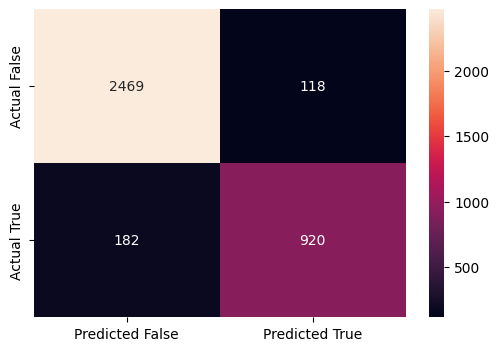


TESTING PERFORMANCE
              precision    recall  f1-score   support

       False       0.91      0.92      0.91       648
        True       0.80      0.78      0.79       275

    accuracy                           0.88       923
   macro avg       0.85      0.85      0.85       923
weighted avg       0.88      0.88      0.88       923



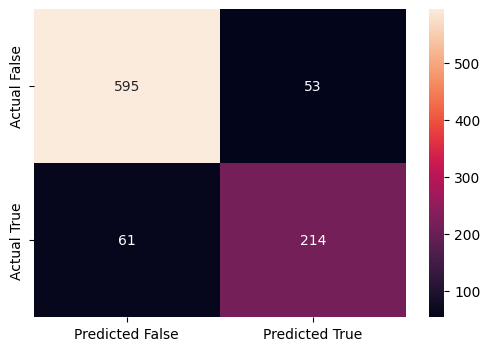

In [ ]:
print("TRAINING PERFORMANCE")
eval_pred(y_train, rfBestDepth.predict(X_train))

print()
print("TESTING PERFORMANCE")
eval_pred(y_test, rfBestDepth.predict(X_test))

10 appears to be a good ballpark for how short we should prune the forest to avoid most of the overfitting.  We are already getting better predictions than when we optimized depth for the standard decision tree (likely because we can go deeper without overfitting as harshly).  We can search through this more thoroughly when we optimize everything in GridSearchCV.

### GridSearchCV

In [ ]:
# Let's figure out some hyperparameters of our current best model

#dir(rfBestDepth.estimators_[0].tree_)
depth_list = np.array([rfBestDepth.estimators_[i].tree_.max_depth for i in range(len(rfBestDepth.estimators_))])
leaves_list = np.array([rfBestDepth.estimators_[i].tree_.n_leaves for i in range(len(rfBestDepth.estimators_))])
features_list = np.array([rfBestDepth.estimators_[i].tree_.n_features for i in range(len(rfBestDepth.estimators_))])
#rfBestDepth.estimators_[0].tree_.n_leaves, rfBestDepth.estimators_[0].tree_.n_features
depth_list, leaves_list, features_list

(array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]),
 array([224, 185, 229, 196, 201, 226, 168, 178, 179, 186, 163, 211, 204,
        163, 190, 204, 218, 159, 178, 193, 178, 201, 203, 211, 180, 204,
        156, 217, 176, 156, 213, 237, 225, 222, 181, 171, 201, 197, 217,
        204, 109, 207, 217, 152, 217, 176, 215, 185, 181, 187, 194, 223,
        227, 187, 182, 196, 187, 184, 210, 211, 186, 198, 163, 138, 185,
        199, 201, 183, 214, 214, 208, 157, 222, 156, 203, 176, 160, 177,
        188, 218, 196, 184, 192, 233, 235, 212, 211, 192, 180, 175, 203,
        186, 204, 155, 164, 197, 159, 2

In [ ]:
# Because random forest is significantly more computationally expensive, we will
# be looking at less hyperparameters at a time
param_grid = {
    "class_weight": [None, 'balanced'],
    "criterion": ["gini", "entropy"],
    "max_depth": [6, 8, 10],
    "max_features": [None, 14, 15],
    "max_leaf_nodes": [100, 200],
    #"min_samples_leaf": [1, 3, 5]
    #"max_samples": [0.9, 1],
}
#     "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
#              }

# # Type of scoring used to compare parameter combinations - recall score for class 1
# scorer = metrics.make_scorer(recall_score, pos_label = 1)

grid_search = GridSearchCV(RandomForestClassifier(random_state=7), param_grid, cv=5)
grid_search.fit(X_train, y_train)

rfBest = grid_search.best_estimator_

In [ ]:
grid_search.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 14,
 'max_leaf_nodes': 100}

TRAINING PERFORMANCE
              precision    recall  f1-score   support

       False       0.92      0.94      0.93      2587
        True       0.85      0.81      0.83      1102

    accuracy                           0.90      3689
   macro avg       0.89      0.87      0.88      3689
weighted avg       0.90      0.90      0.90      3689



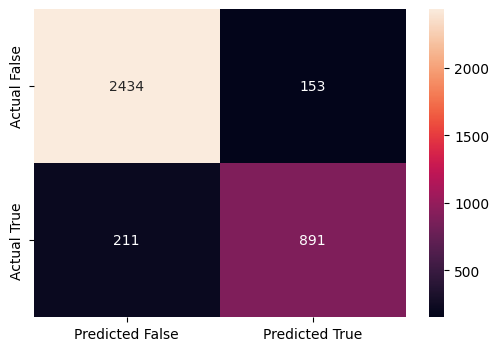


TESTING PERFORMANCE
              precision    recall  f1-score   support

       False       0.91      0.91      0.91       648
        True       0.79      0.79      0.79       275

    accuracy                           0.87       923
   macro avg       0.85      0.85      0.85       923
weighted avg       0.87      0.87      0.87       923



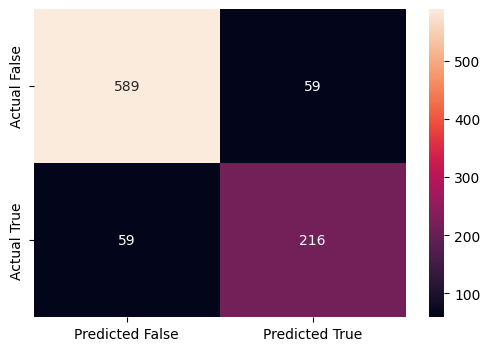

In [ ]:
print("TRAINING PERFORMANCE")
eval_pred(y_train, rfBest.predict(X_train))

print()
print("TESTING PERFORMANCE")
eval_pred(y_test, rfBest.predict(X_test))

In [ ]:
# Let's further optimize using entropy and comparing results between None class
# weight and 'balanced' class weight.
# If accuracy doesn't take a huge hit with 'balanced', but the model still
# boosts recall, then it will likely be preferable to us.

param_grid = {
    #"class_weight": [None, 'balanced'],
    #"criterion": ["gini", "entropy"],
    "max_depth": [6, 8, 10],
    "max_features": [13, 14, 15],
    "max_leaf_nodes": [80, 100, 120],
    #"min_samples_leaf": [1, 3, 5]
    #"max_samples": [0.9, 1],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=7, class_weight=None, criterion='entropy'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

###################################################

param_grid = {
    #"class_weight": [None, 'balanced'],
    #"criterion": ["gini", "entropy"],
    "max_depth": [6, 8, 10],
    "max_features": [13, 14, 15],
    "max_leaf_nodes": [80, 100, 120],
    #"min_samples_leaf": [1, 3, 5]
    #"max_samples": [0.9, 1],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=7, class_weight="balanced", criterion='entropy'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

rfBestBalanced = grid_search.best_estimator_
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 13, 'max_leaf_nodes': 100}
{'max_depth': 10, 'max_features': 14, 'max_leaf_nodes': 120}


TESTING PERFORMANCE UNBALANCED
              precision    recall  f1-score   support

       False       0.91      0.92      0.91       648
        True       0.80      0.79      0.79       275

    accuracy                           0.88       923
   macro avg       0.85      0.85      0.85       923
weighted avg       0.88      0.88      0.88       923



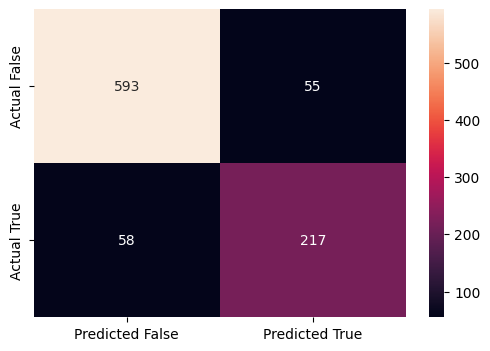


TESTING PERFORMANCE BALANCED
              precision    recall  f1-score   support

       False       0.93      0.87      0.90       648
        True       0.73      0.84      0.78       275

    accuracy                           0.86       923
   macro avg       0.83      0.85      0.84       923
weighted avg       0.87      0.86      0.86       923



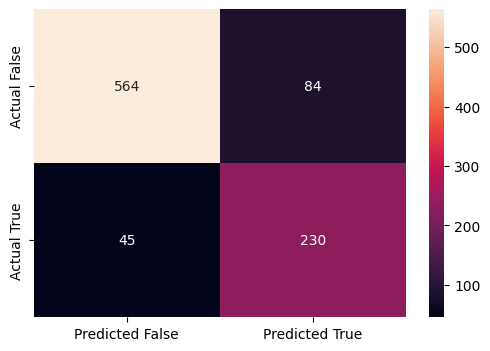

In [ ]:
print("TESTING PERFORMANCE UNBALANCED")
rfBestNone = RandomForestClassifier(random_state=7, class_weight=None, criterion='entropy', max_depth=8, max_features=13, max_leaf_nodes=100)
rfBestNone.fit(X_train, y_train)
eval_pred(y_test, rfBestNone.predict(X_test))

print()
print("TESTING PERFORMANCE BALANCED")
eval_pred(y_test, rfBestBalanced.predict(X_test))

The balanced model appears to have a similar f-score (0.01 lower on both False and True), but increases recall of customers by about 5%.  This seems like a valuable trade-off considering the weight of missing out on a potential customer, so I would consider the balanced model to be better.

Overall, it seems more difficult to get the random forest model to as high of a recall score as the decision tree, despite it being slightly more accurate generally.

### Insights

In [ ]:
grid_search.best_params_ # of the balanced model using entropy as it's criterion

{'max_depth': 10, 'max_features': 14, 'max_leaf_nodes': 120}

In [ ]:
pd.Series(rfBase.feature_importances_, index=X_train.columns).sort_values(ascending=False)

,0
time_spent_on_website,0.262531
first_interaction_Website,0.169312
page_views_per_visit,0.121517
age,0.113128
profile_completed_Medium,0.096817
website_visits,0.066495
last_activity_Phone Activity,0.032861
current_occupation_Unemployed,0.031285
last_activity_Website Activity,0.023498
current_occupation_Student,0.018569


In [ ]:
pd.Series(rfBestDepth.feature_importances_, index=X_train.columns).sort_values(ascending=False)

,0
time_spent_on_website,0.267386
first_interaction_Website,0.246624
profile_completed_Medium,0.127341
age,0.076872
page_views_per_visit,0.065863
website_visits,0.039394
last_activity_Phone Activity,0.036436
current_occupation_Unemployed,0.030810
last_activity_Website Activity,0.026781
current_occupation_Student,0.026267


In [ ]:
pd.Series(rfBestBalanced.feature_importances_, index=X_train.columns).sort_values(ascending=False)

,0
time_spent_on_website,0.272389
first_interaction_Website,0.194395
profile_completed_Medium,0.157532
age,0.089308
page_views_per_visit,0.084167
last_activity_Website Activity,0.038082
current_occupation_Unemployed,0.036563
website_visits,0.035662
last_activity_Phone Activity,0.033769
current_occupation_Student,0.016790


**Insights**

In all of the iterations of the random forest models, the top 5 features were consistent and significantly more telling than any of the others.  Those features are:
- time_spent_on_website
- first_interaction_Website
- profile_completed_medium
- age
- page_views_per_visit

The top three of these features are the exact same as the top three within the standard decision tree.  In addition to page_views_per_visit at #5, it is very that ExtraaLearn's website presence is driving a lot of their sales.

Interestingly, while random forest does put more weight on all of the features, and there are no zero importance values like there are with the decision trees, all of the medias are still at the bottom, which is also congruent with the EDA's findings that the distribution of lead conversions vs non-conversions with different media interactions is near identical.  Not something that one would immediately expect to be irrelevant.

## **Actionable Insights and Recommendations**

#### Insights

Our objectives are to:
- Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
- Find the factors driving the lead conversion process
- Create a profile of the leads which are likely to convert

For building the ML model, it seems that either the random forest or standard decision tree would do fine.  **Both identify leads-to-convert very effectively, but we weren't able to get random forest's recall score as high as the decision tree**.  For this reason, if ExtraaLearn wanted to prioritize recall, or converting as many leads as possible despite potential company expenses, I would go with the decision tree.  Otherwise, if accuracy is the priority, then the random forest model appears better.

---

The primary factors driving the lead conversion process discovered during EDA appeared to be **first_interaction_Website, profile_comepleted_high, time_spent_on_website, and referral**.  There was also a significant correlation found between conversion likelihood and number of media channels interacted with, but this we such a small percentage of the population that it would need more data to be confirmed.

For both types of models, the three clear frontrunning features in terms of importance towards conversion were time_spent_on_website, first_interaction_Website, and profile_completed_medium.  Considering that we dropped the profile_completed_high column because it was duplicate to the model (because that value could be inferred from medium and low's values), it is fair to assume that profile_completed_medium's importance is more likely related to profile_completed_high's true value.  **This means that the top three features found by the model to be of importance were also discovered in EDA to have a significant relation to lead conversion rate**.  The other two important model features, age and page_views_per_visit, were not found to be of particular importance during EDA, but perhaps something would be discovered if they were looked at more closely.



#### Reccomendations

- I am going to go out on a limb and say that time_spent_on_website is more correlational towards lead conversion rather than causational.  This can still be useful if ExtraaLearn is trying to identify a lead that might convert, but I don't think the company should invest resources into specifically keeping users on their webpage.  Increasing website engagement would be a plus, but not necessarily for this direct consequence of increasing time_spent_on_website.  It would deffinintely be worth ExtraaLearn looking more into why time_spent_on_website and conversion rate are correlated, however.

- I do think that profile_completed_high is causational.  There are many Psychology studies on the fact that people are more likely to commit to things that they have already invested some effort into.  It might be worth ExtraaLearn making profile completion a little easier or more streamlined, or finding other ways to encourage users to complete their profiles, such as incentives or increased access to information.

- first_interaction_Website being such an indicator towards lead conversion implies either that the website is forming the best first impression in leads, or that outlets that encourage leads to interact with the website first are saying good things about ExtraaLearn.  Either way, it would be worth ExtraaLearn's while to invest more resources in digital marketting and presence to attempt to get more leads interacting with the website first.  I think this really plays into the ideal profile that would constitute a lead-to-be-converted.  It is someone that sees the website, engages with the website, and completes the steps necessary to learn more about the company through the website.  For these reasons, I don't think print media is a valuable outlet for ExtraaLearn to expand into, and I think they should really just focus on online presence above all else.